# Loan Approval Classification

In [1]:
#importing basic necessary libraries
import pandas as pd
import numpy as np
#importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#importing train test split
from sklearn.model_selection import train_test_split
#importing label encoder 
from sklearn.preprocessing import LabelEncoder
#importing standard scaler
from sklearn.preprocessing import StandardScaler
#importing vif to remove multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
#import chi2 test
from scipy.stats import chi2_contingency
#importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
#importing evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [2]:
#importing the dataset and reading the 1st 5 records
df=pd.read_csv('loan_data.csv')
df.head()

person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

In [3]:
#Checking the shape of the dataset
df.shape

(45000, 14)

In [4]:
#Checking the general info about the datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
#Checking for null values
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [6]:
#Checking for duplicates
df.duplicated().sum()

0

In [7]:
#Checking for general stats
df.describe()

person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0.000000                    2.000000   
25%         8.590000             0.070000                    3.000000   
50%        11.010000             0.120000                    4.000000   
75%        12.990000             0.190000                    8.000000   
max        20.000000             0.660000                   30.000000   

       credit_score   loan_status  
count  45000.000000  45000.000000  
mean     632.608756      0.222222  
std       50.435865      0.415744  
min      390.000000      0.000000  
25%      601.000000      0.000000  
50%      640.000000      0.000000  
75%      670.000000      0.000000  
max      850.000000      1.000000

In [8]:
#There seems to be mistakes in the age and employment experience columns as the numbers exceed 100 which is practically impossible

# EDA

### Univariate Analysis

In [9]:
df.head(1)

person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   

  previous_loan_defaults_on_file  loan_status  
0                             No            1

In [10]:
#checking unique values in the person_age column
df['person_age'].unique()

array([ 22.,  21.,  25.,  23.,  24.,  26., 144., 123.,  20.,  32.,  34.,
        29.,  33.,  28.,  35.,  31.,  27.,  30.,  36.,  40.,  50.,  45.,
        37.,  39.,  44.,  43.,  41.,  46.,  38.,  47.,  42.,  48.,  49.,
        58.,  65.,  51.,  53.,  66.,  61.,  54.,  57.,  59.,  62.,  60.,
        55.,  52.,  64.,  70.,  78.,  69.,  56.,  73.,  63.,  94.,  80.,
        84.,  76.,  67., 116., 109.])

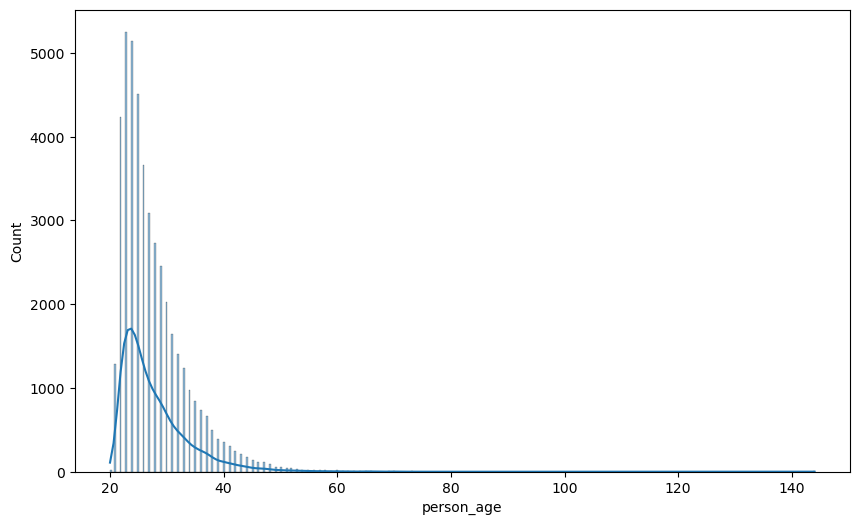

In [11]:
#checking the spread of the column person_age
plt.figure(figsize=(10,6))
sns.histplot(data = df,x='person_age',kde=-True)
plt.show()

In [12]:
#most of the applicants are below 50yrs of age. We have many outliers

In [13]:
#checking the unique values in the person_gender column
df['person_gender'].unique()

array(['female', 'male'], dtype=object)

In [14]:
#checking the count of males and females in the dataset
df['person_gender'].value_counts()

person_gender
male      24841
female    20159
Name: count, dtype: int64

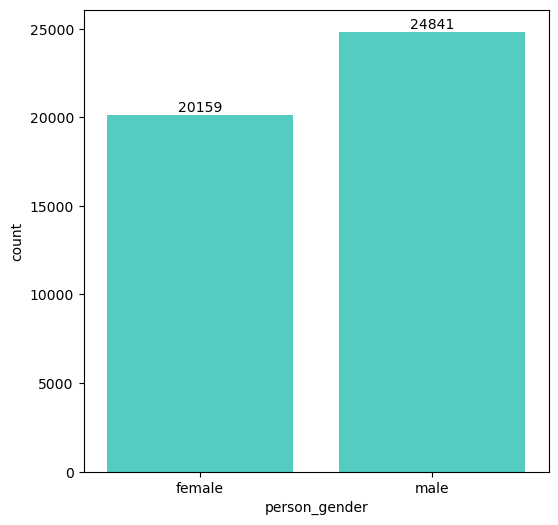

In [15]:
#plotting the count
plt.figure(figsize=(6,6))
ax= sns.countplot(data = df, x='person_gender',color='turquoise')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [16]:
#there are more males who have applied for loan compared to females

In [17]:
#checking the various education levels of the applicants
df['person_education'].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

In [18]:
#checking the counts of each category and plotting the same
df['person_education'].value_counts()

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

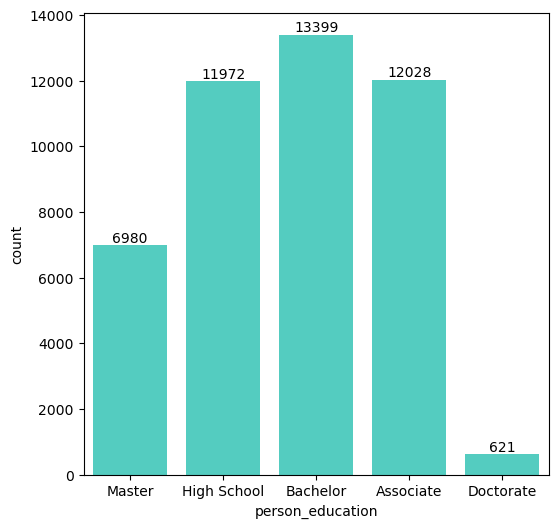

In [19]:
#plotting the count
plt.figure(figsize=(6,6))
ax= sns.countplot(data = df, x='person_education',color='turquoise')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

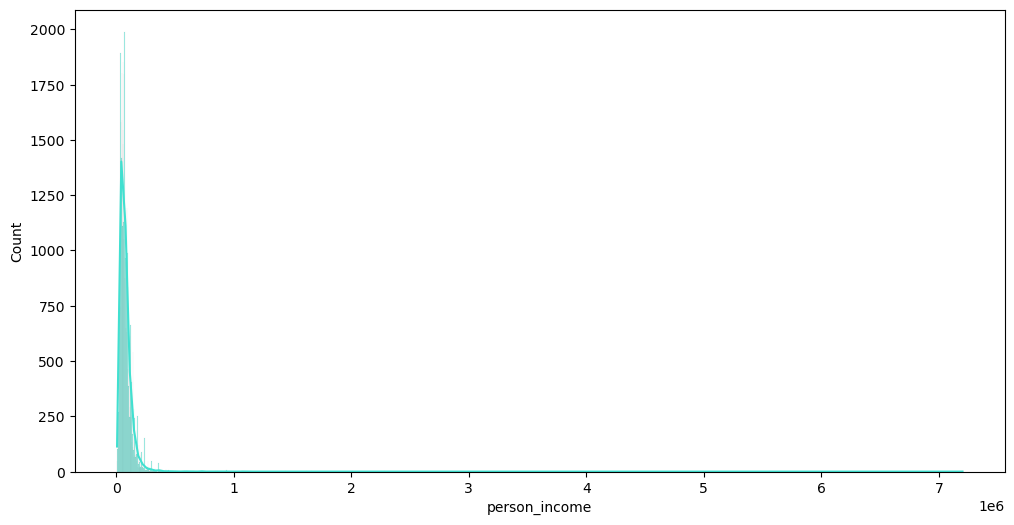

In [20]:
#checking the spread of the income column
plt.figure(figsize=(12,6))
sns.histplot(data = df, x='person_income',color='turquoise',kde='True')
plt.show()

In [21]:
#income column seems to be highly skewed, with most of them being on the lower side of the spectrum

In [22]:
#checking the various experience years of the applicants and plotting the same
df['person_emp_exp'].unique()

array([  0,   3,   1,   5,   4,   2,   7,   6, 125,   8, 121, 101, 100,
        12,  10,   9,  14,  13,  11,  15,  16,  17,  19,  28,  25,  18,
        24,  22,  20,  23,  21,  31,  26,  27,  29,  32,  30, 124,  40,
        43,  33,  44,  34,  42,  37,  45,  36,  41,  47,  38,  39,  35,
        57,  46,  49,  48,  50,  76,  62,  61,  58,  93,  85], dtype=int64)

In [23]:
#this seems odd as the employments experience shows 80+ yrs of experience which is practically impossible

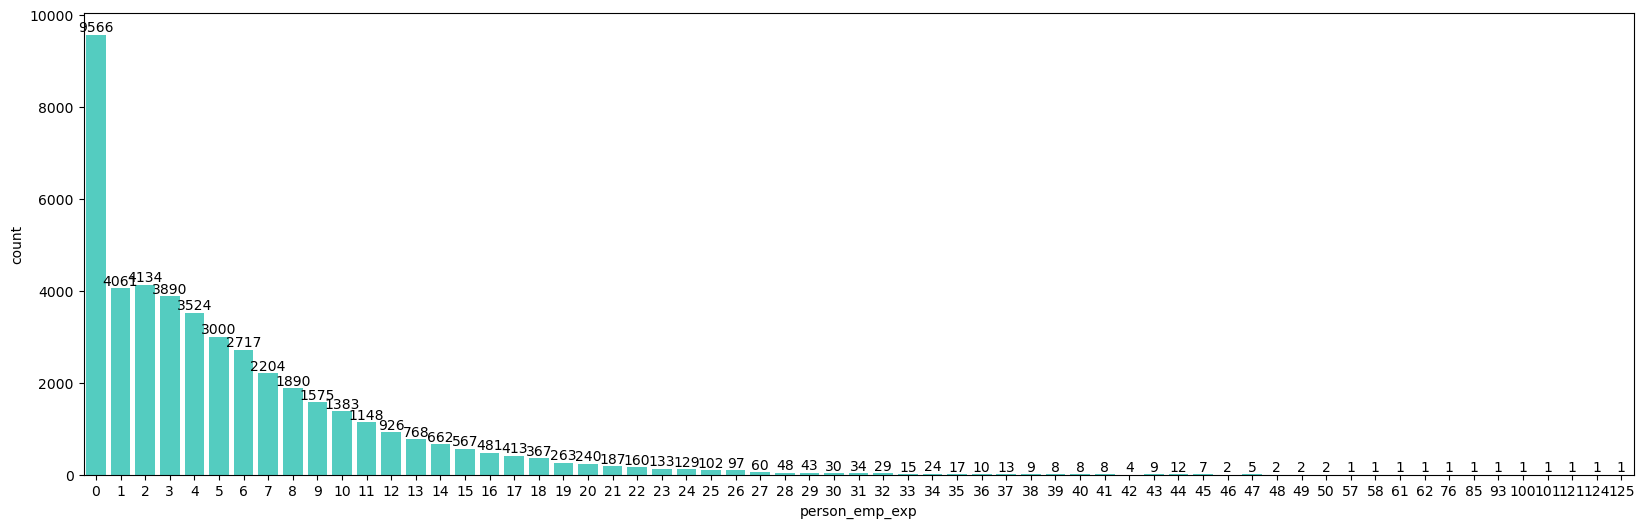

In [24]:
#plotting the count
plt.figure(figsize=(20,6))
ax= sns.countplot(data = df, x='person_emp_exp',color='turquoise')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [25]:
#Checking the home ownership status of the applicants and plotting to see the apread
df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

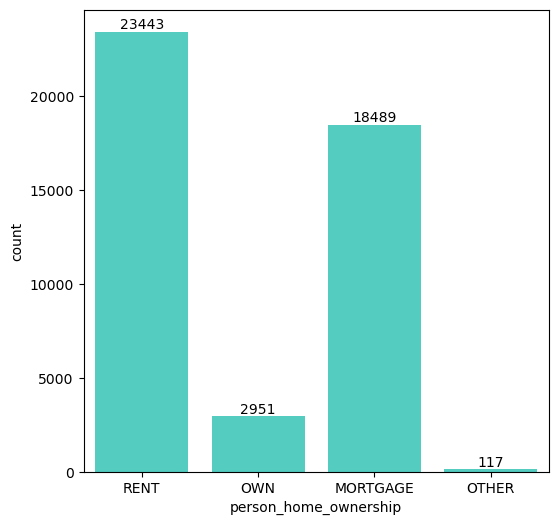

In [26]:
#plotting the count
plt.figure(figsize=(6,6))
ax= sns.countplot(data = df, x='person_home_ownership',color='turquoise')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

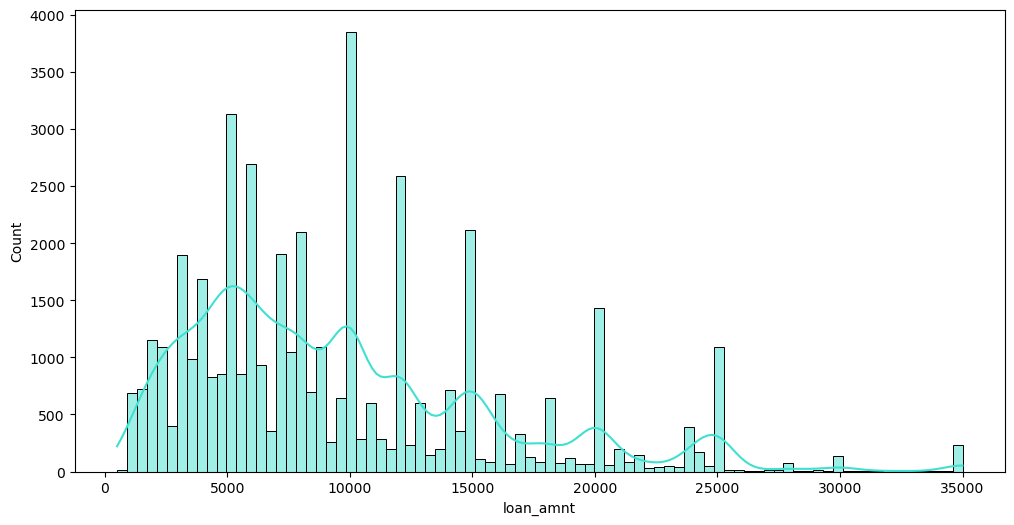

In [27]:
#checking the loan amount column to see the various loam amounts applied
plt.figure(figsize=(12,6))
sns.histplot(data = df, x='loan_amnt',color='turquoise',kde='True')
plt.show()

In [28]:
#checking the purpose the loan was applied
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

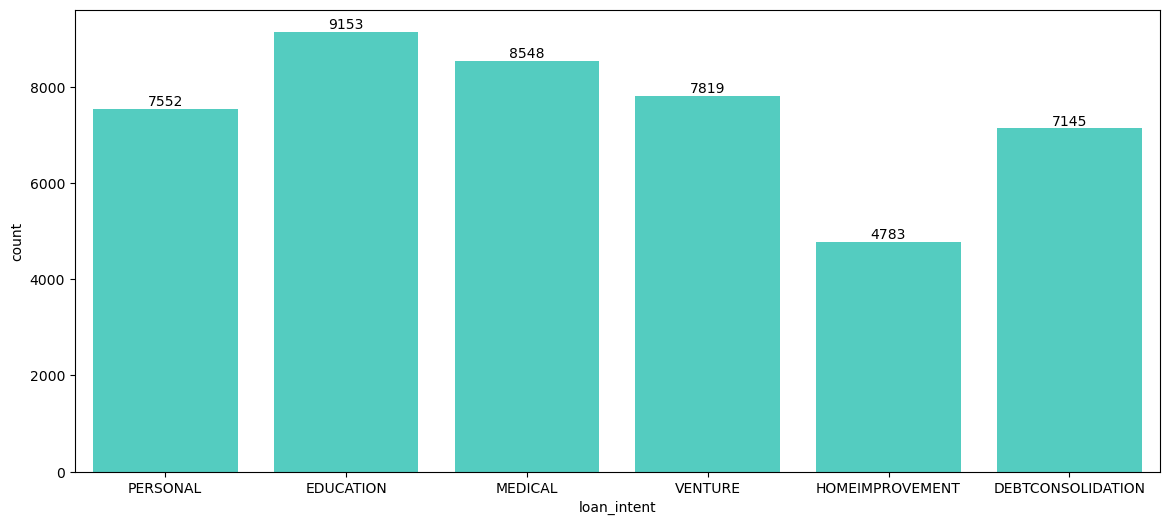

In [29]:
#plotting the count
plt.figure(figsize=(14,6))
ax= sns.countplot(data = df, x='loan_intent',color='turquoise')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [30]:
#checking the various interest rates
df['loan_int_rate'].nunique()

1302

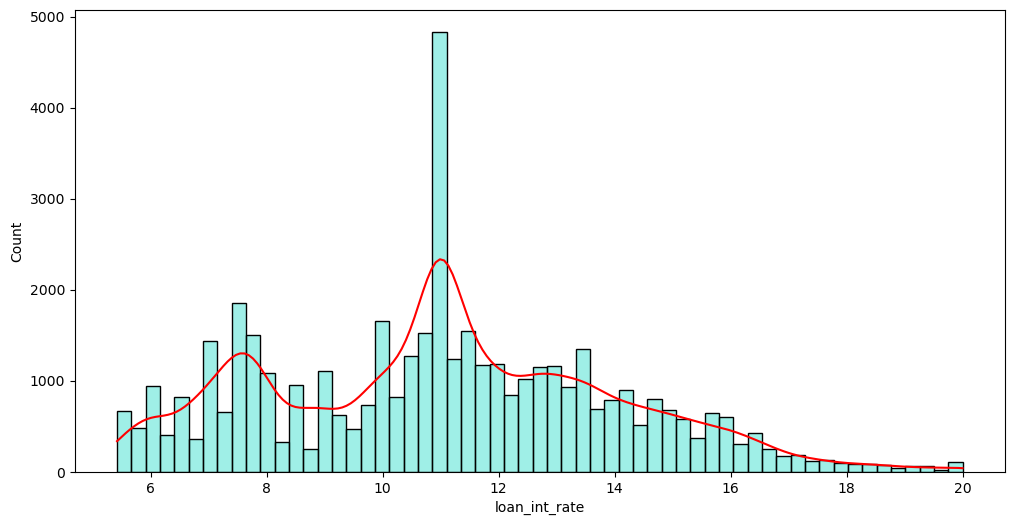

In [31]:
plt.figure(figsize=(12,6))
ax=sns.histplot(data = df, x='loan_int_rate',color='turquoise',kde='True')
plt.setp(ax.lines, color="red")  
plt.show()

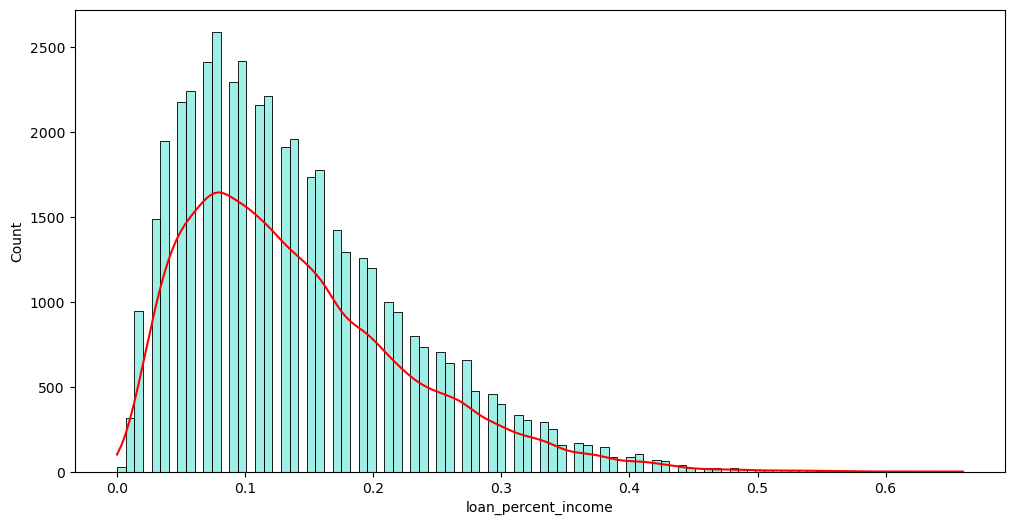

In [32]:
#loan_percent_income column
plt.figure(figsize=(12,6))
ax=sns.histplot(data = df, x='loan_percent_income',color='turquoise',kde='True')
plt.setp(ax.lines, color="red")  
plt.show()

In [33]:
#checking the spread of the credit history length of applicants
df['cb_person_cred_hist_length'].unique()

array([ 3.,  2.,  4.,  8.,  7.,  6.,  9., 10.,  5., 11., 16., 15., 12.,
       13., 17., 14., 25., 28., 27., 22., 19., 29., 23., 26., 20., 21.,
       30., 24., 18.])

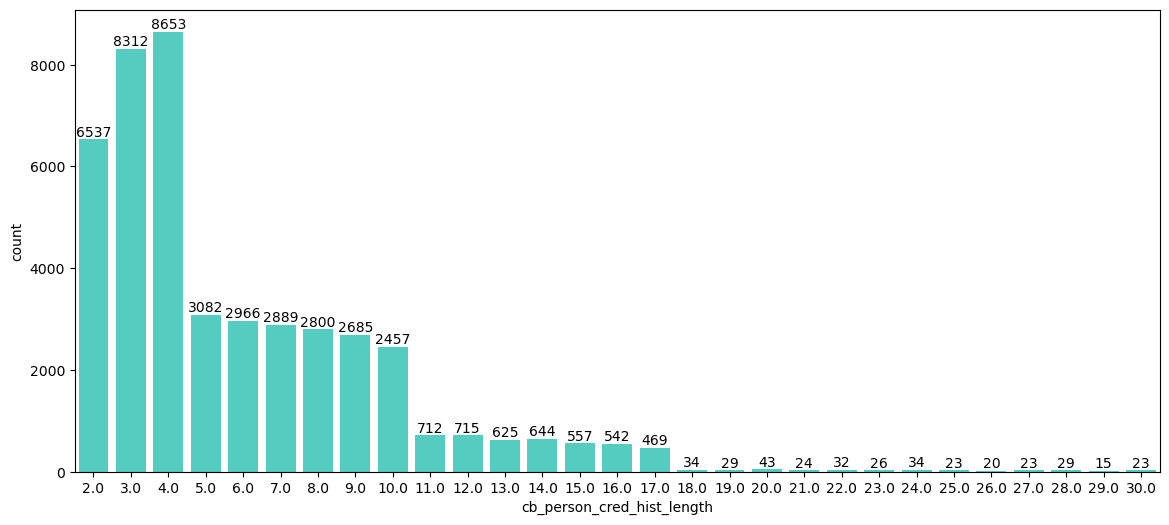

In [34]:
#plotting the count
plt.figure(figsize=(14,6))
ax= sns.countplot(data = df, x='cb_person_cred_hist_length',color='turquoise')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [35]:
#checking the credit score spread 
df['credit_score'].nunique()

340

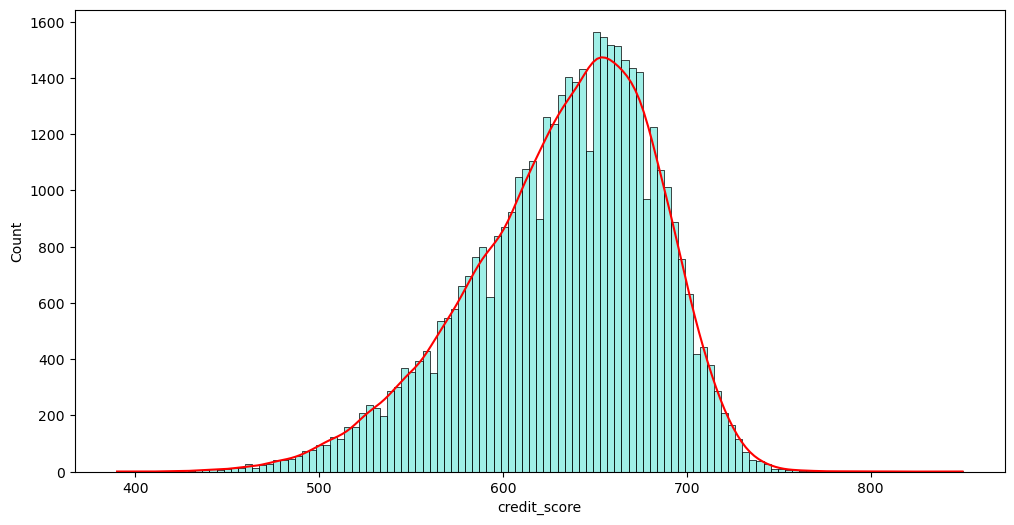

In [36]:
plt.figure(figsize=(12,6))
ax=sns.histplot(data = df, x='credit_score',color='turquoise',kde='True')
plt.setp(ax.lines, color="red")  
plt.show()

In [37]:
#checking how many applicants have/dont have any previous defaults
df['previous_loan_defaults_on_file'].value_counts()

previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64

In [38]:
#checking the loan status column to see how many loans are approved and how many rejected
df['loan_status'].value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

In [39]:
# data seems to be imbalanced

### Bivariate Analysis

In [40]:
#creating a new temporary column for easy understanding
df1=df.copy()
bins = [0, 18, 30, 45, 60, 80,float('inf')]  # Define bin edges
labels = ['0-18', '18-30', '30-45', '45-60', '60-80','80+']  # Labels for bins

# Apply pd.cut()
df1['age_group'] = pd.cut(df1['person_age'], bins=bins, labels=labels, right=False)


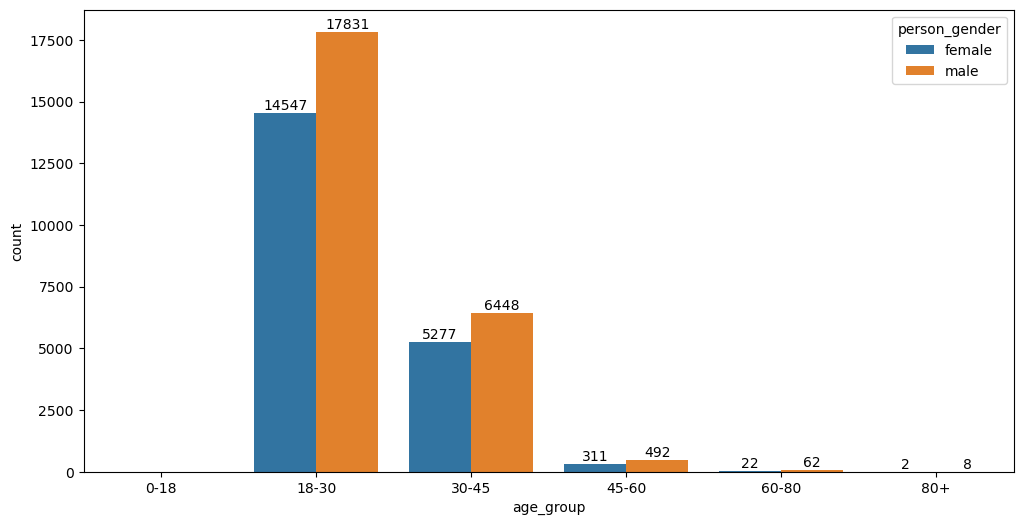

In [41]:
#age groups and the gender dsitribution 
plt.figure(figsize=(12,6))
ax=sns.countplot(data=df1,x='age_group',hue='person_gender')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

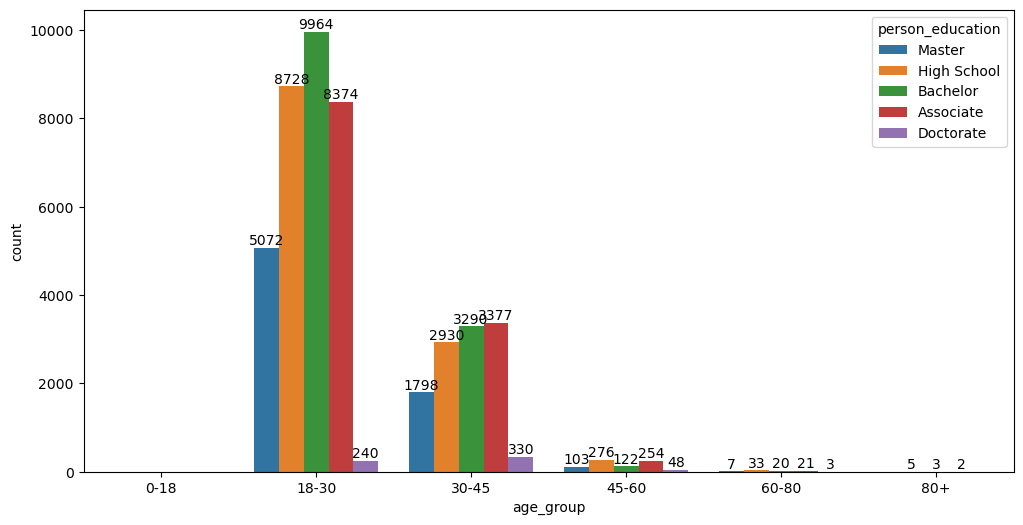

In [42]:
#age groups and education distribution
plt.figure(figsize=(12,6))
ax=sns.countplot(data=df1,x='age_group',hue='person_education')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

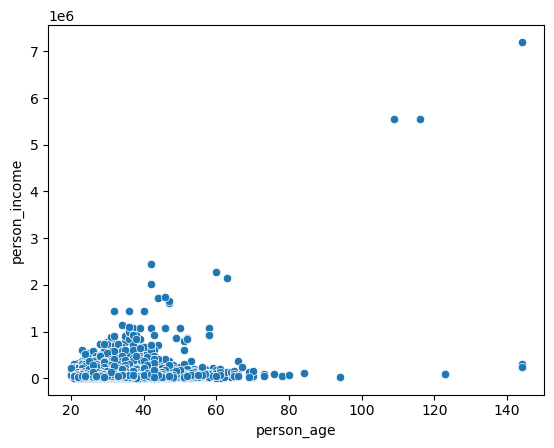

In [43]:
#Age vs Income
sns.scatterplot(data=df,x='person_age',y='person_income')
plt.show()

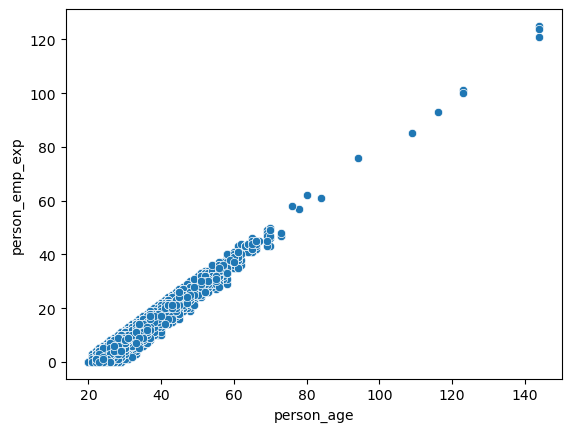

In [44]:
#age vs employment experience
sns.scatterplot(data=df,x='person_age',y='person_emp_exp')
plt.show()

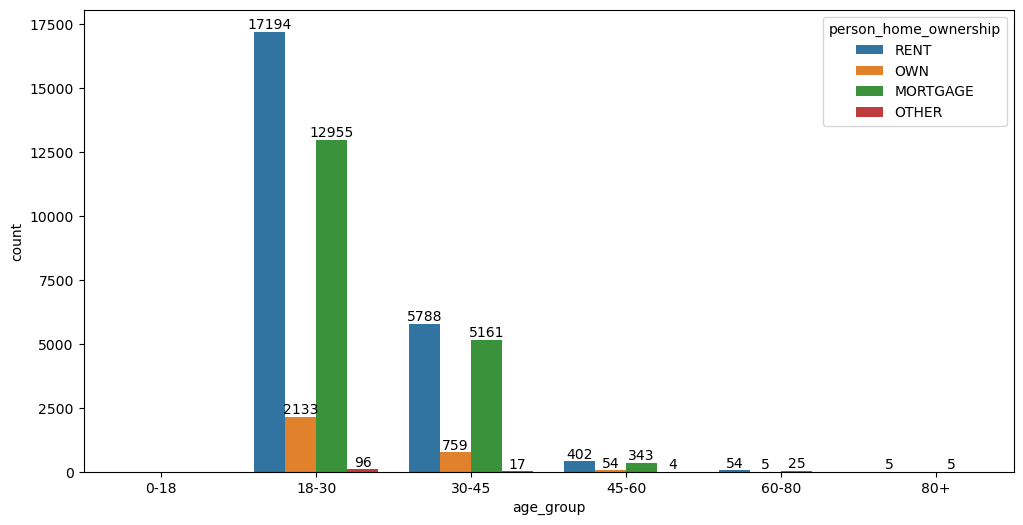

In [45]:
#age vs loan intent
plt.figure(figsize=(12,6))
ax=sns.countplot(data=df1,x='age_group',hue='person_home_ownership')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

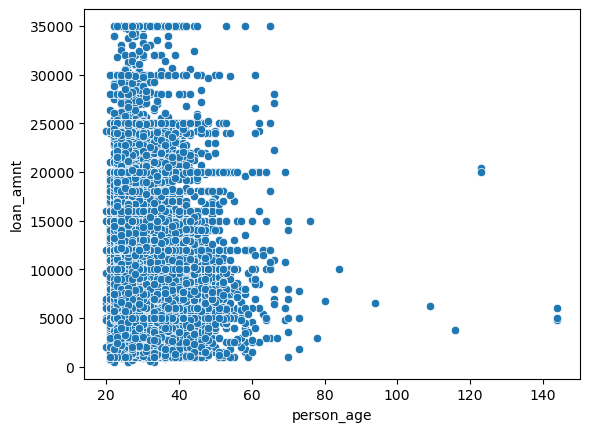

In [46]:
#age vs laon amount
sns.scatterplot(data=df,x='person_age',y='loan_amnt')
plt.show()

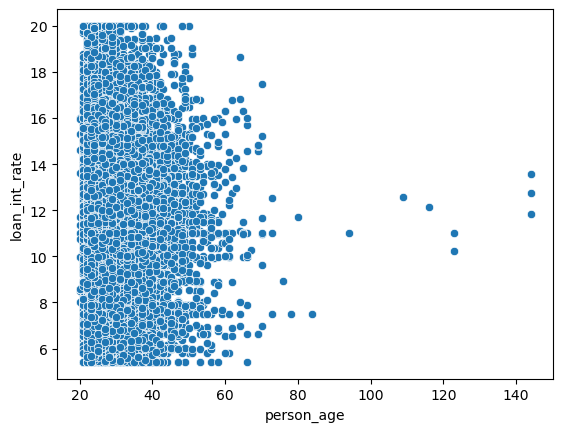

In [47]:
#age vs employment experience
sns.scatterplot(data=df,x='person_age',y='loan_int_rate')
plt.show()

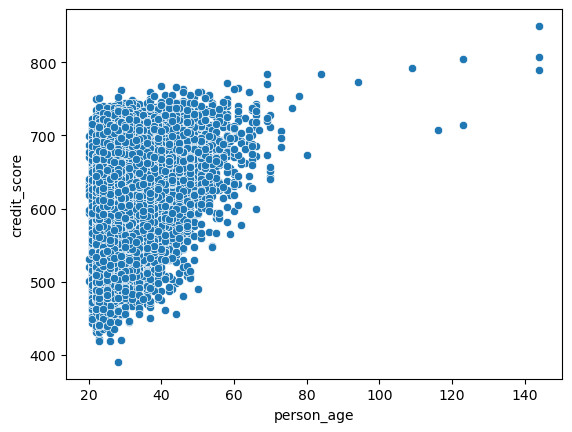

In [48]:
#age vs employment experience
sns.scatterplot(data=df,x='person_age',y='credit_score')
plt.show()

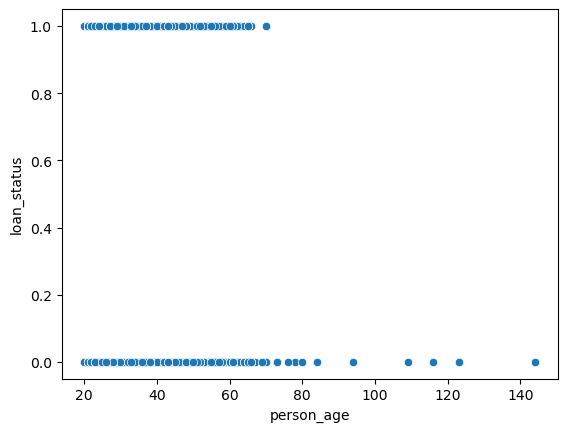

In [49]:
#age vs employment experience
sns.scatterplot(data=df,x='person_age',y='loan_status')
plt.show()

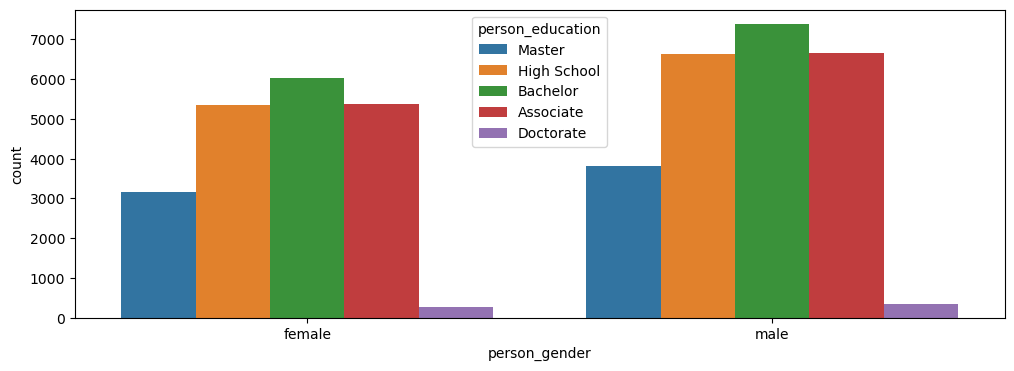

In [50]:
#gender vs education
plt.figure(figsize=(12,4))
sns.countplot(data=df,x='person_gender',hue='person_education')
plt.show()

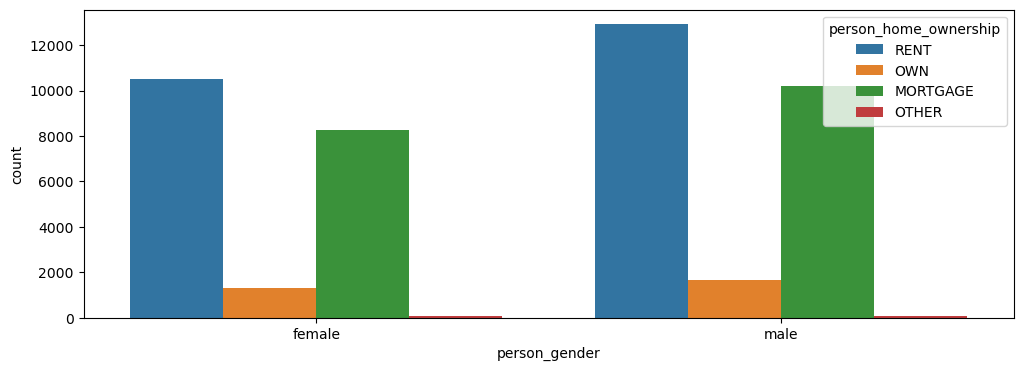

In [51]:
#gender vs ownership
plt.figure(figsize=(12,4))
sns.countplot(data=df,x='person_gender',hue='person_home_ownership')
plt.show()

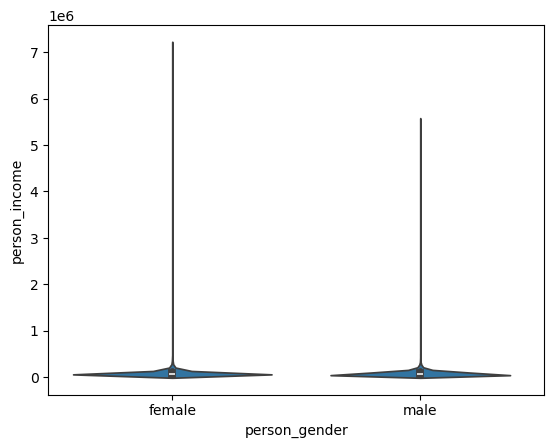

In [52]:
#gender vs income
sns.violinplot(x="person_gender", y="person_income", data=df)
plt.show()

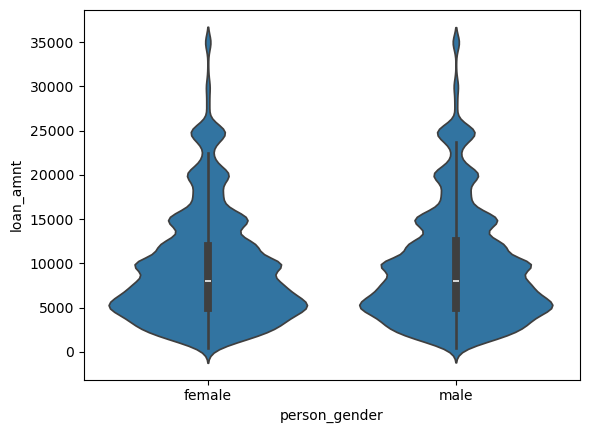

In [53]:
#gender vs loan amount
sns.violinplot(x="person_gender", y="loan_amnt", data=df)
plt.show()

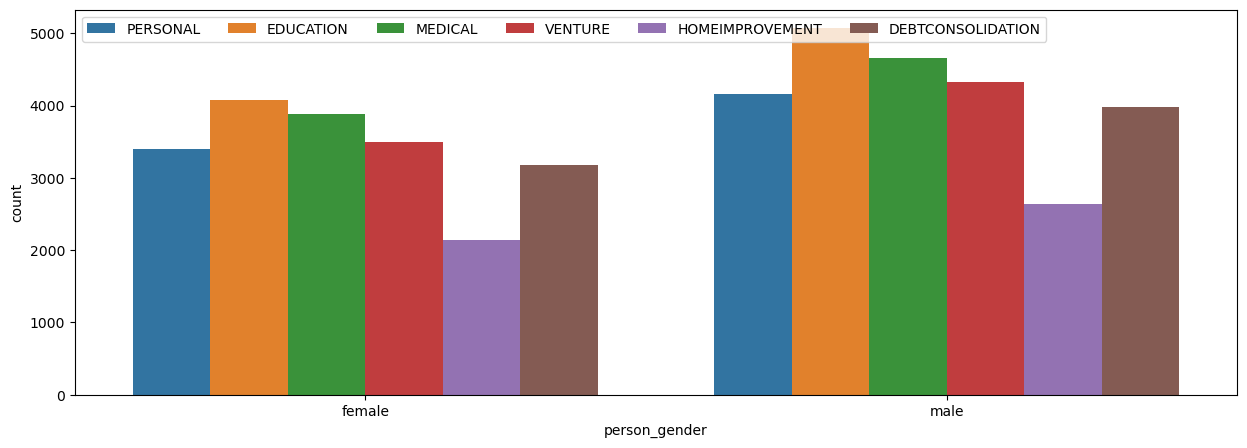

In [54]:
#gender vs loan intent
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='person_gender',hue='loan_intent')
plt.legend(ncol=6,loc='upper left')
plt.show()

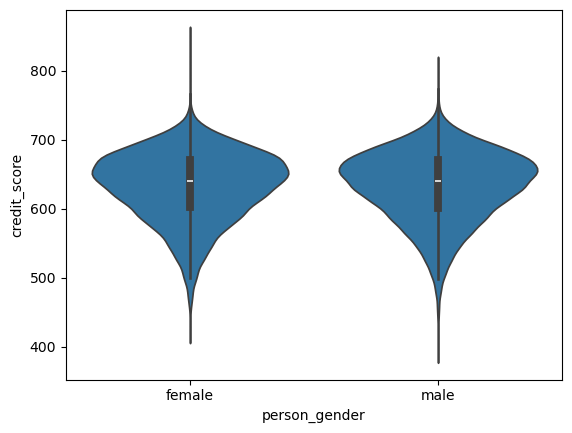

In [55]:
#gender vs credit score
sns.violinplot(x="person_gender", y="credit_score", data=df)
plt.show()

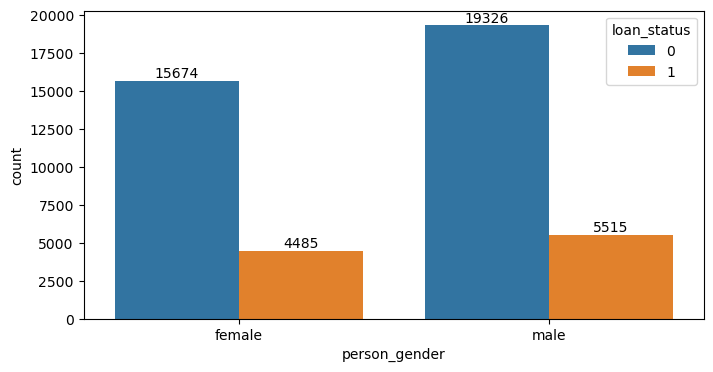

In [56]:
#gender vs Loan status
plt.figure(figsize=(8,4))
ax=sns.countplot(data=df,x='person_gender',hue='loan_status')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

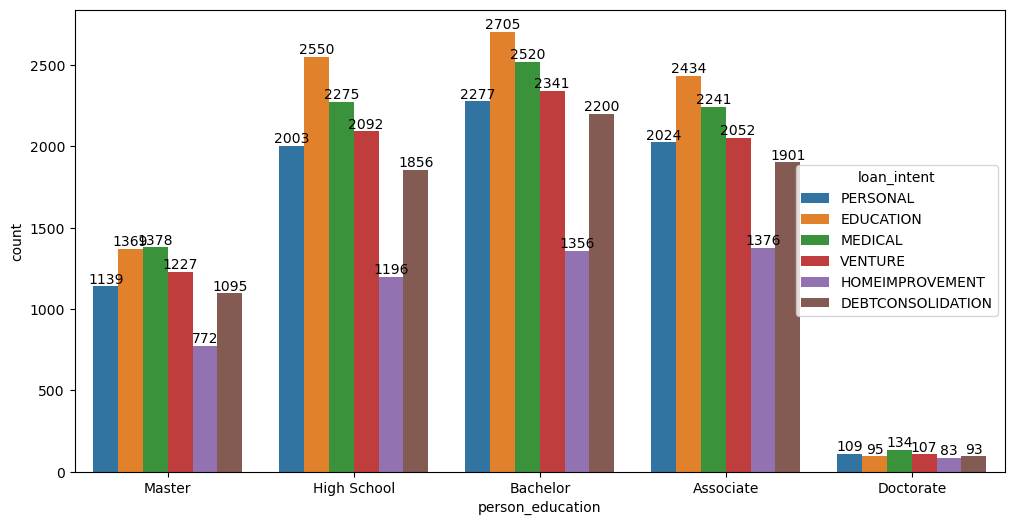

In [57]:
#education vs loan intent
plt.figure(figsize=(12,6))
ax=sns.countplot(data=df,x='person_education',hue='loan_intent')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

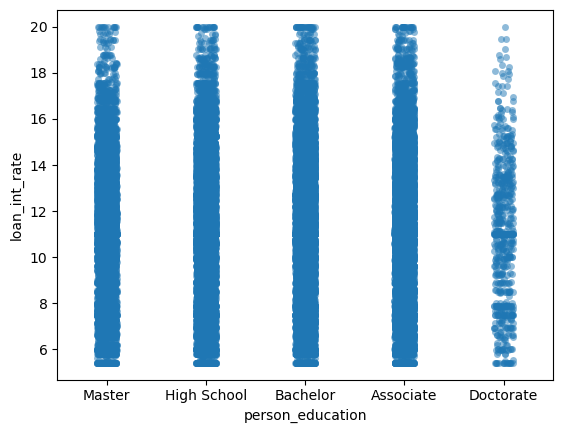

In [58]:
#educations vs interest rate
sns.stripplot(x="person_education", y="loan_int_rate", data=df, jitter=True, alpha=0.5)
plt.show()

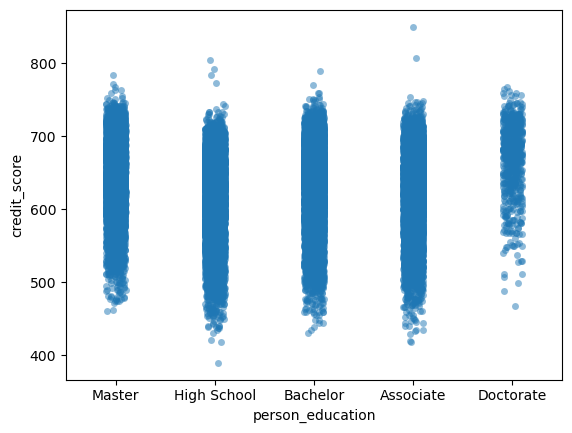

In [59]:
#educations vs credit score
sns.stripplot(x="person_education", y="credit_score", data=df, jitter=True, alpha=0.5)
plt.show()

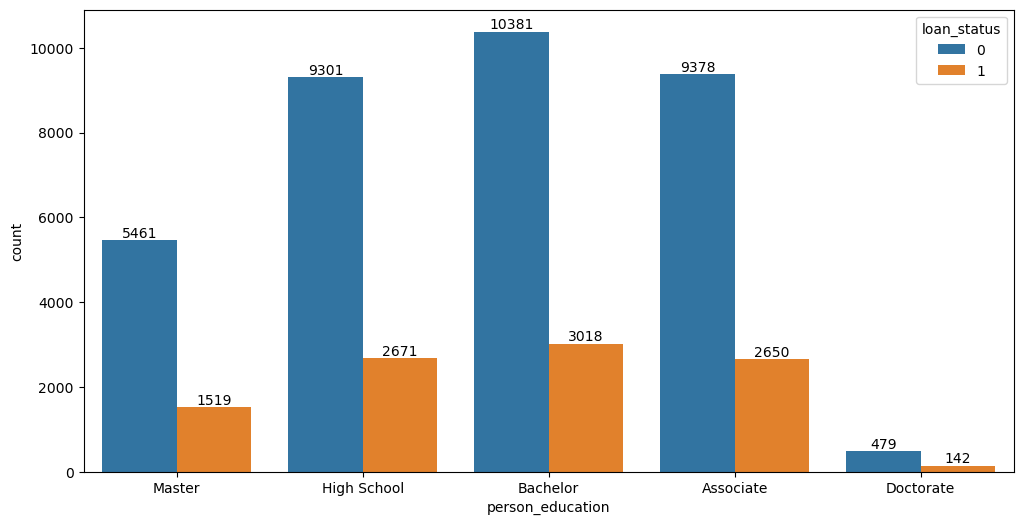

In [60]:
#education vs loan status
plt.figure(figsize=(12,6))
ax=sns.countplot(data=df,x='person_education',hue='loan_status')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

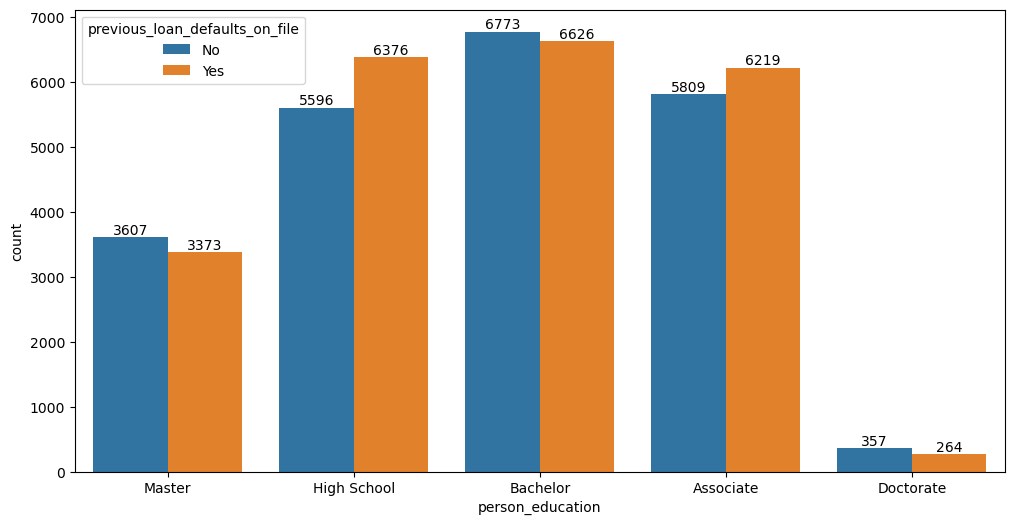

In [61]:
#education vs loan defaults
plt.figure(figsize=(12,6))
ax=sns.countplot(data=df,x='person_education',hue='previous_loan_defaults_on_file')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

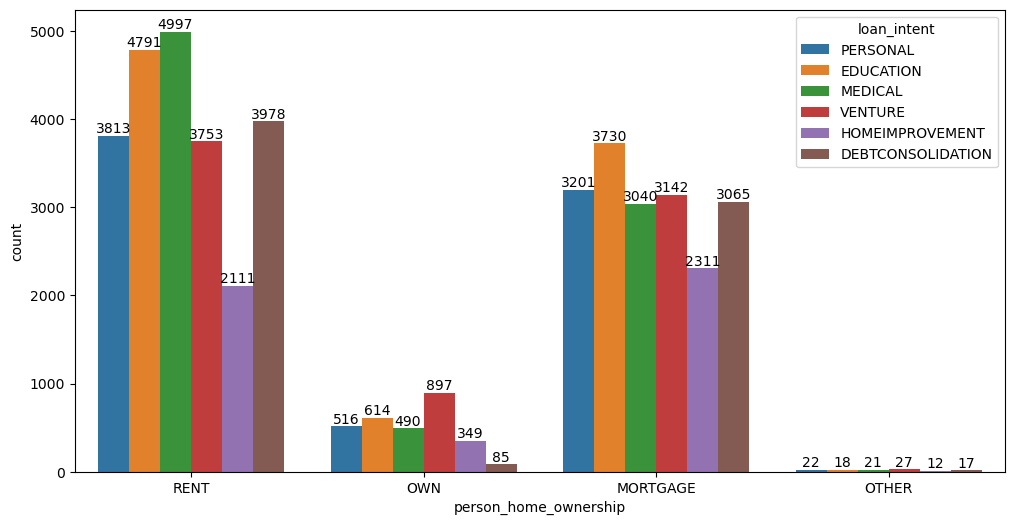

In [62]:
#home ownership vs intent
plt.figure(figsize=(12,6))
ax=sns.countplot(data=df,x='person_home_ownership',hue='loan_intent')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

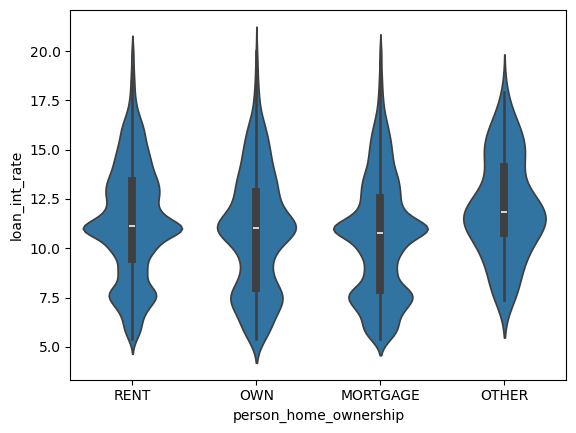

In [63]:
#ownership vs interest rate
sns.violinplot(x="person_home_ownership", y="loan_int_rate", data=df)
plt.show()

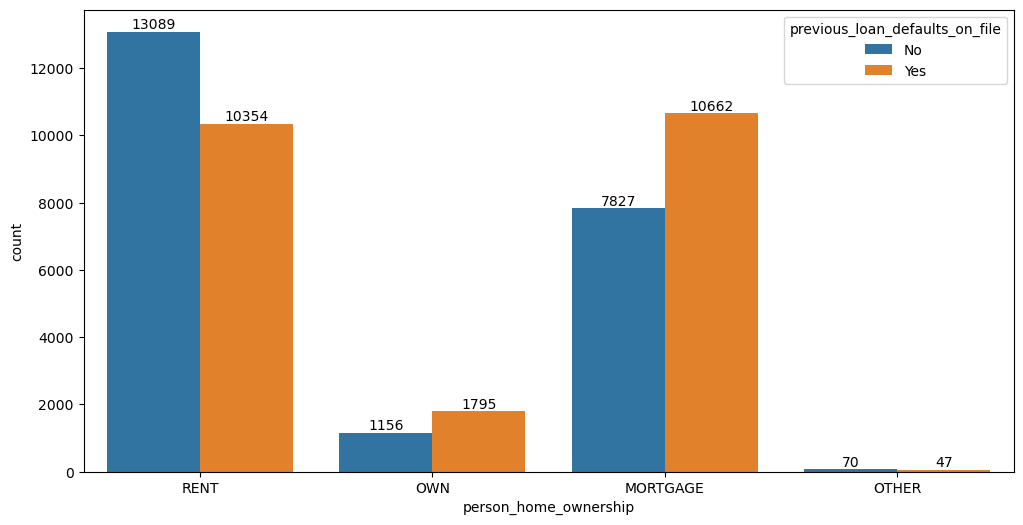

In [64]:
#home ownership vs prev defaults
plt.figure(figsize=(12,6))
ax=sns.countplot(data=df,x='person_home_ownership',hue='previous_loan_defaults_on_file')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

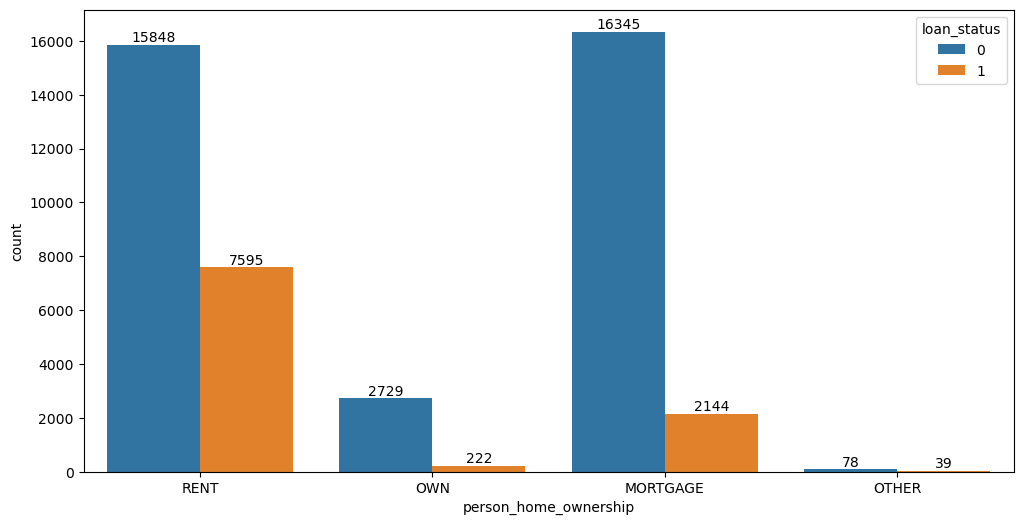

In [65]:
#home ownership vs loan status
plt.figure(figsize=(12,6))
ax=sns.countplot(data=df,x='person_home_ownership',hue='loan_status')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

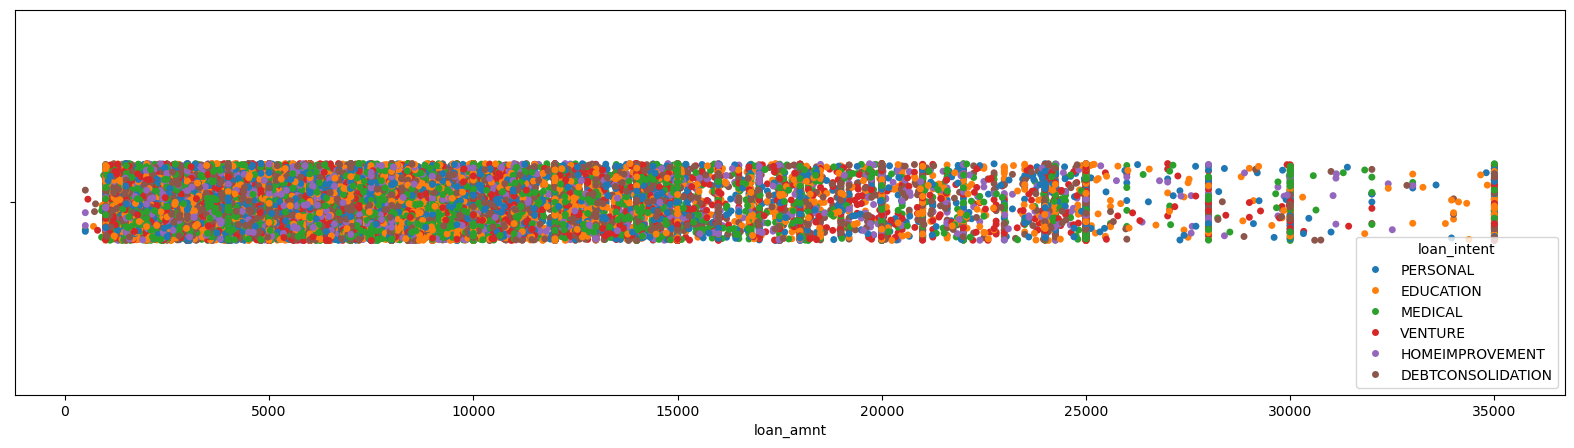

In [66]:
#loan amnt vs intent
plt.figure(figsize=(20,5))
sns.stripplot(data=df,x='loan_amnt',hue='loan_intent')
plt.show()

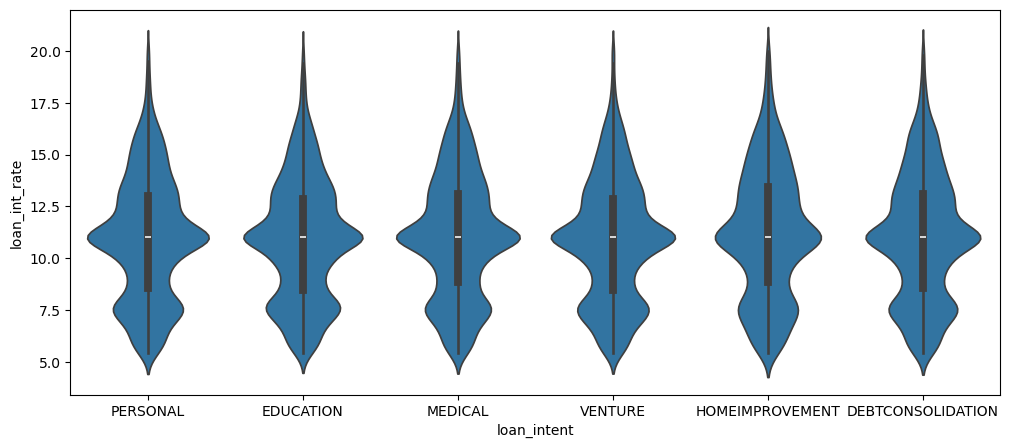

In [67]:
#intent vs interest rate
plt.figure(figsize=(12,5))
sns.violinplot(x="loan_intent", y="loan_int_rate", data=df)
plt.show()

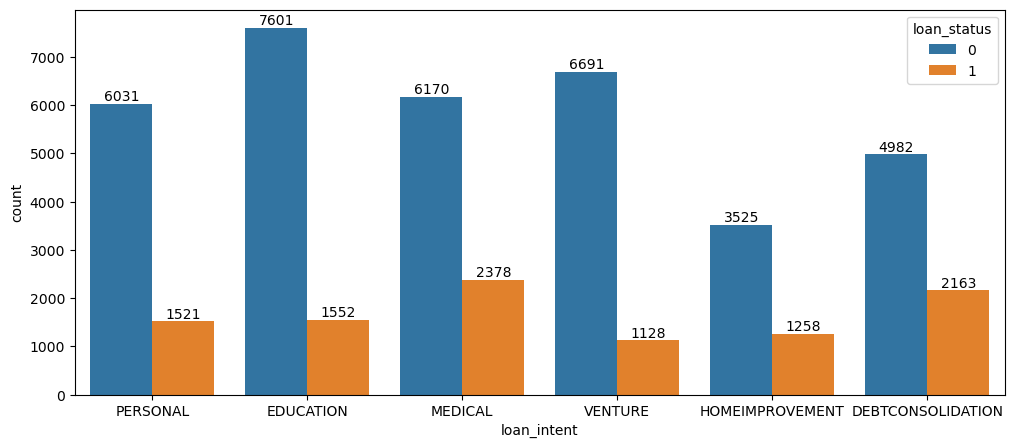

In [68]:
#intent vs loan status
plt.figure(figsize=(12,5))
ax=sns.countplot(data=df,x='loan_intent',hue='loan_status')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

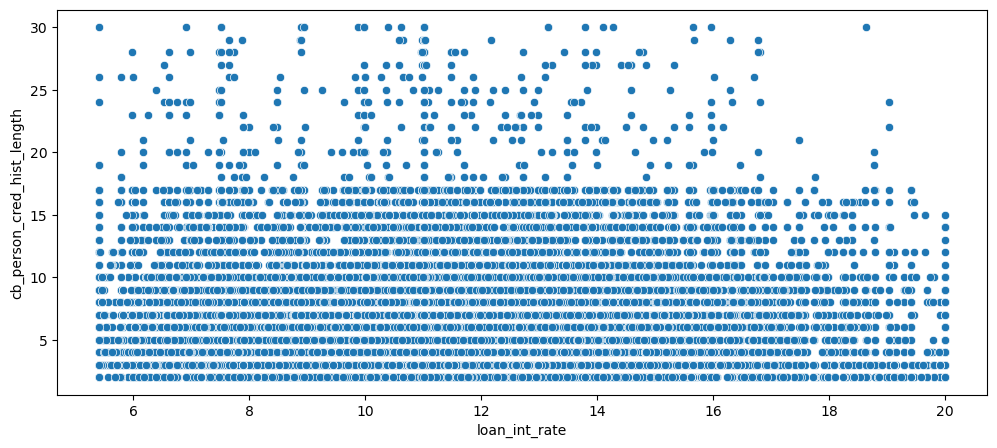

In [69]:
#length of credit history vs interest rate
plt.figure(figsize=(12,5))
sns.scatterplot(x="loan_int_rate", y="cb_person_cred_hist_length", data=df)
plt.show()

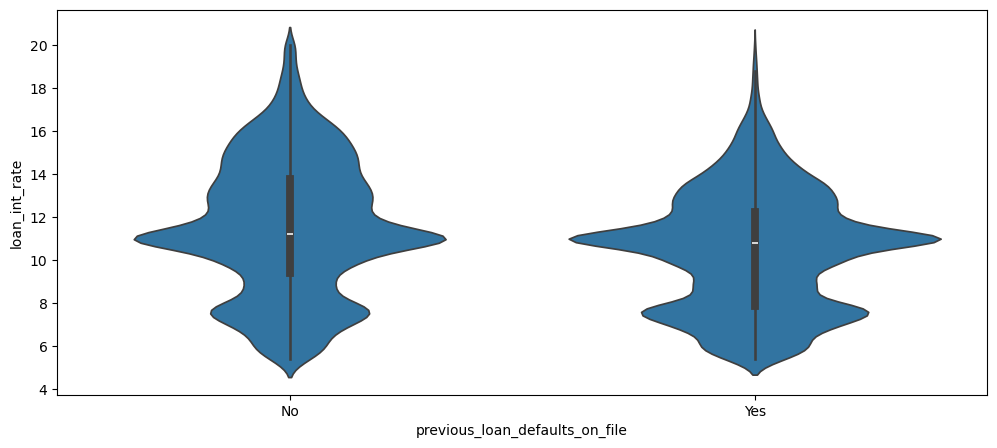

In [70]:
#defaults vs interest rate
plt.figure(figsize=(12,5))
sns.violinplot(x="previous_loan_defaults_on_file", y="loan_int_rate", data=df)
plt.show()

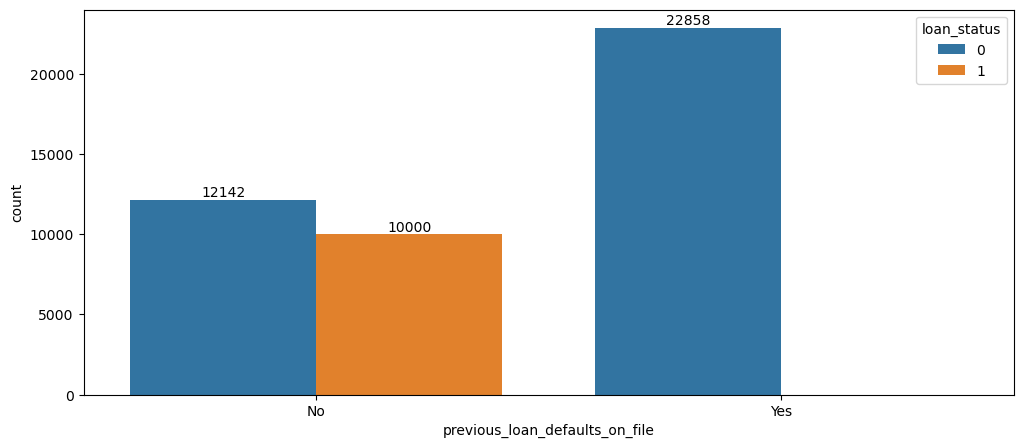

In [71]:
#defaults vs loan status
plt.figure(figsize=(12,5))
ax=sns.countplot(data=df,x='previous_loan_defaults_on_file',hue='loan_status')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

### Multivariate Analysis

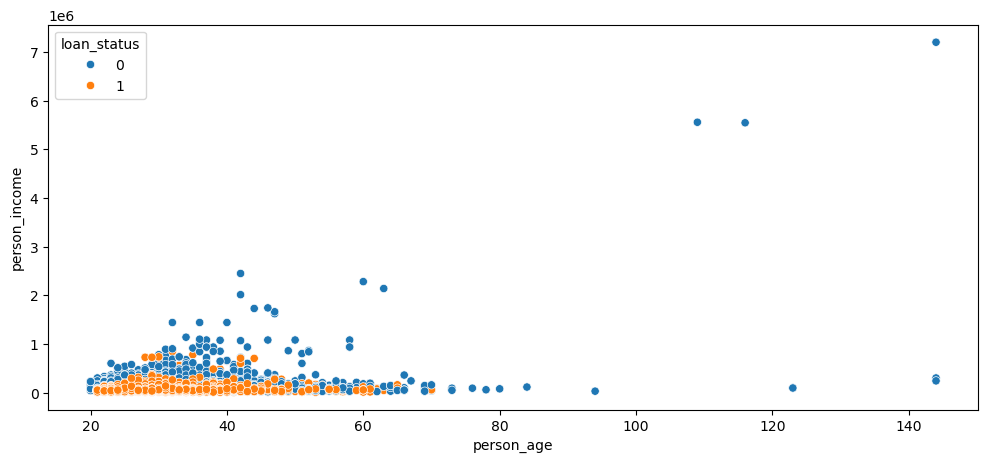

In [72]:
#age and income vs loan status
plt.figure(figsize=(12,5))
sns.scatterplot(data = df,x='person_age',y='person_income',hue='loan_status')
plt.show()

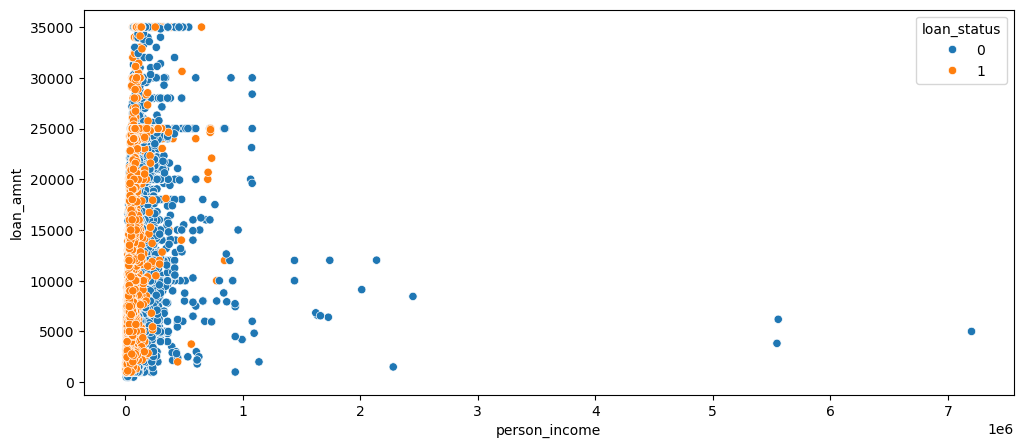

In [73]:
#income and amnt vs loan status
plt.figure(figsize=(12,5))
sns.scatterplot(data = df,x='person_income',y='loan_amnt',hue='loan_status')
plt.show()

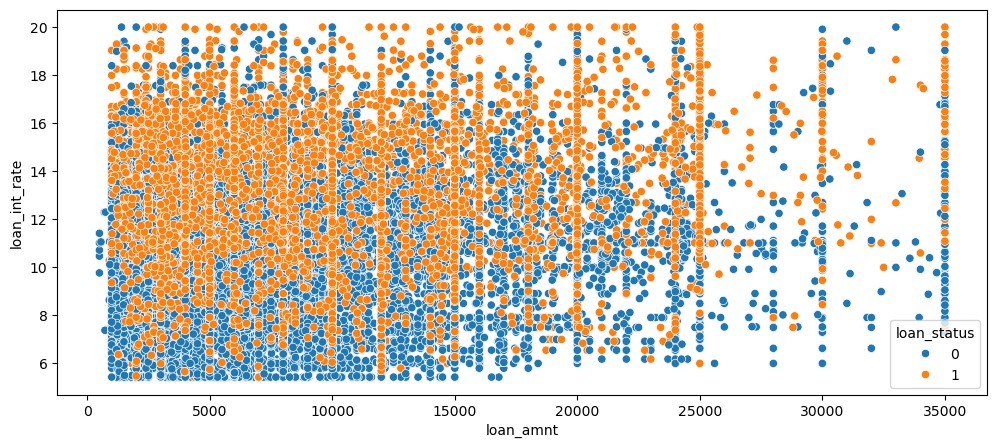

In [74]:
#loan amnt and int rate vs loan status
plt.figure(figsize=(12,5))
sns.scatterplot(data = df,x='loan_amnt',y='loan_int_rate',hue='loan_status')
plt.show()

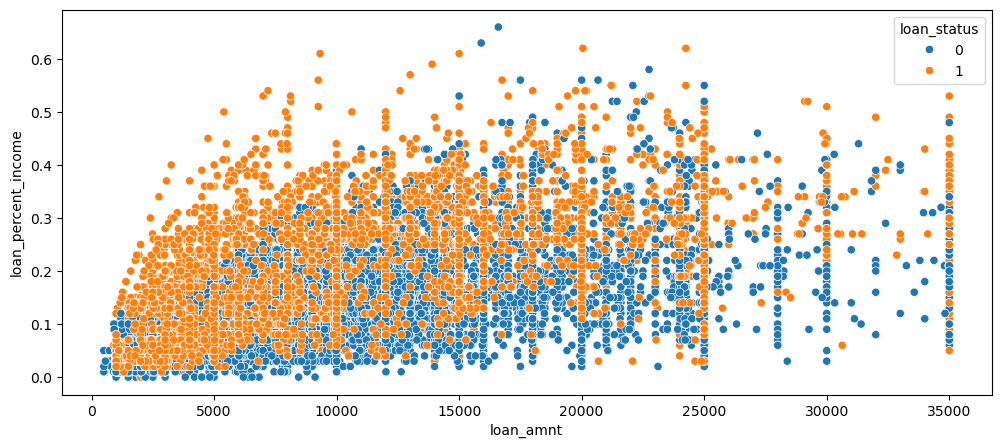

In [75]:
#loan amnt and %income vs loan status
plt.figure(figsize=(12,5))
sns.scatterplot(data = df,x='loan_amnt',y='loan_percent_income',hue='loan_status')
plt.show()

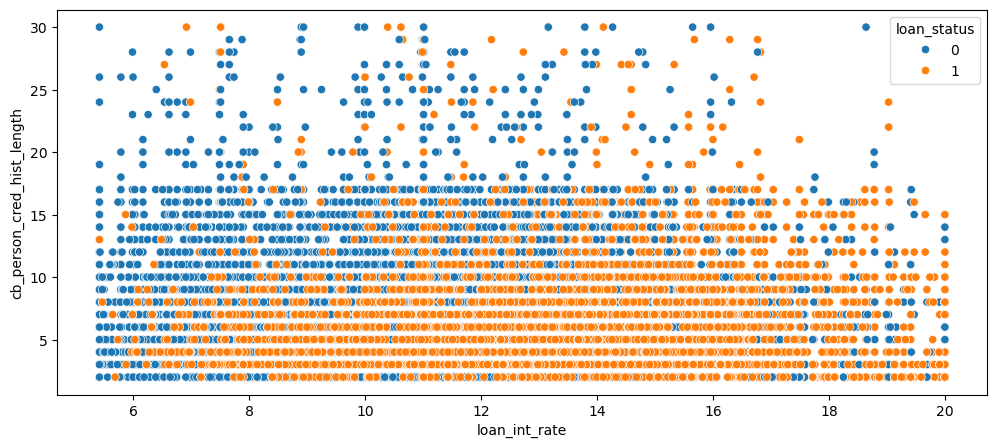

In [76]:
#int rate and credit hist length vs loan status
plt.figure(figsize=(12,5))
sns.scatterplot(data = df,x='loan_int_rate',y='cb_person_cred_hist_length',hue='loan_status')
plt.show()

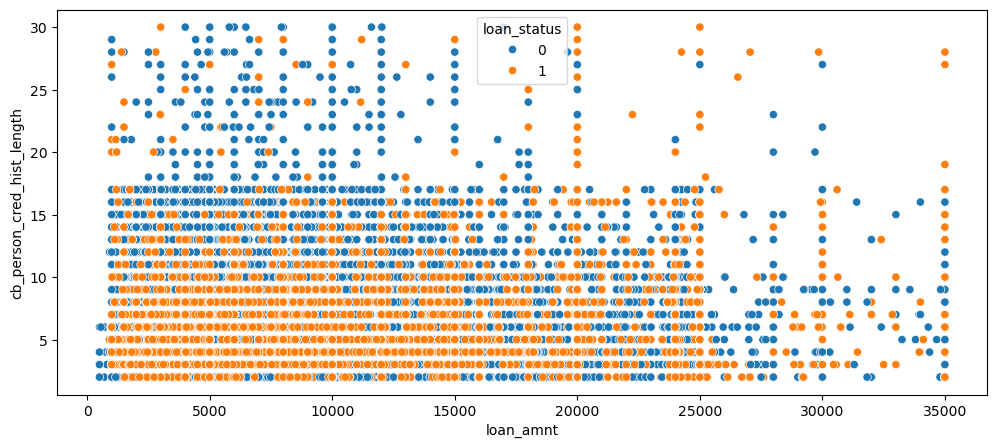

In [77]:
#loan amnt and credit hist length vs loan status
plt.figure(figsize=(12,5))
sns.scatterplot(data = df,x='loan_amnt',y='cb_person_cred_hist_length',hue='loan_status')
plt.show()

# Data Preprocessing

### Checking for outliers and handling them

#### Checking for outliers

In [78]:
num_cols = [col for col in df.columns if df[col].dtype!='O']
num_cols

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'loan_status']

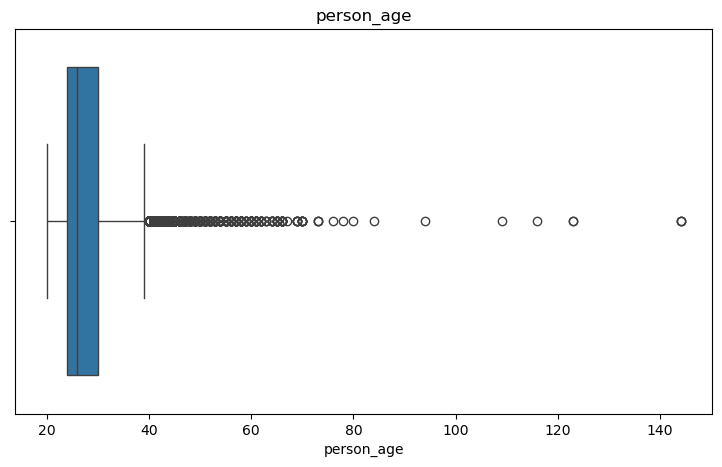

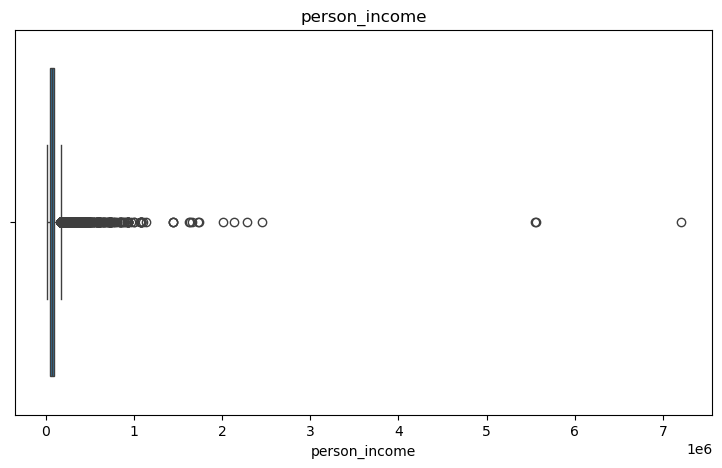

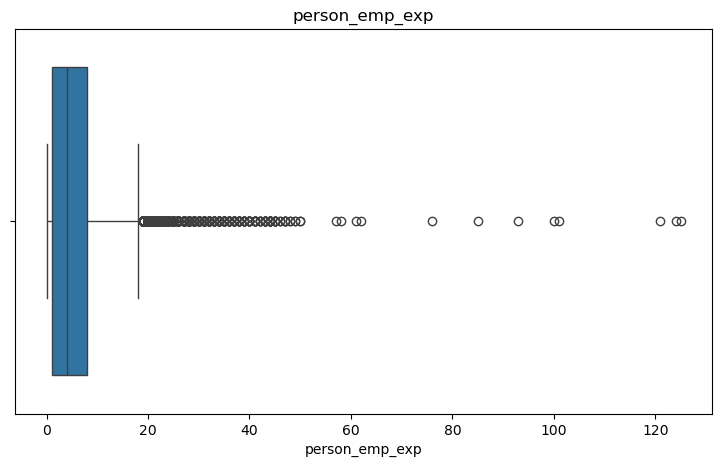

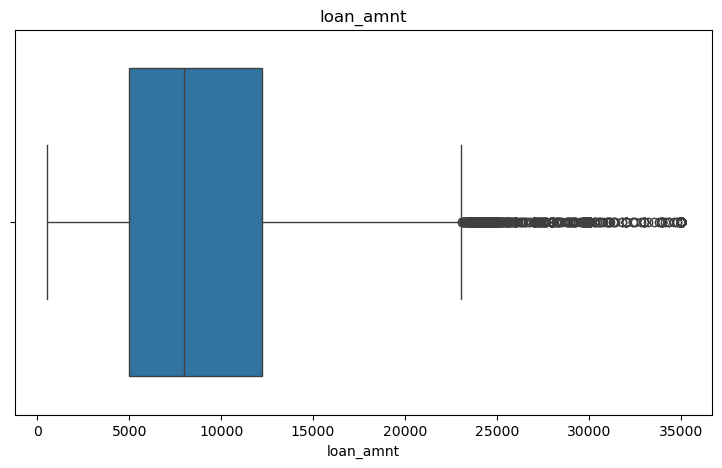

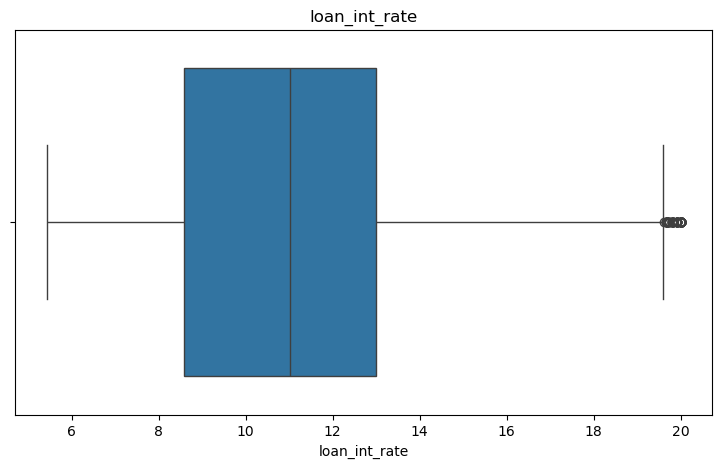

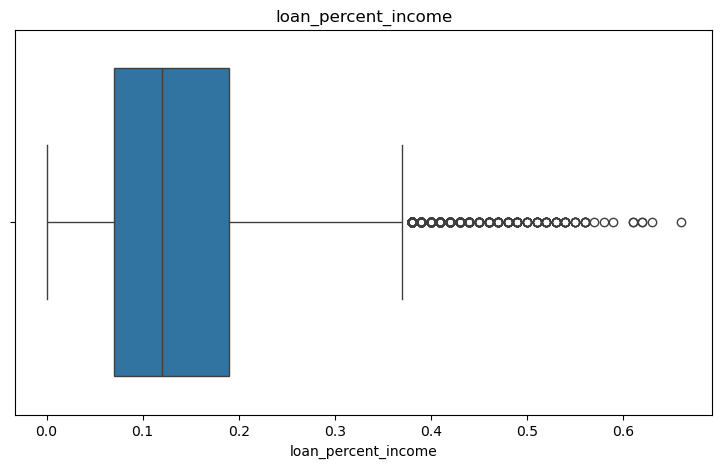

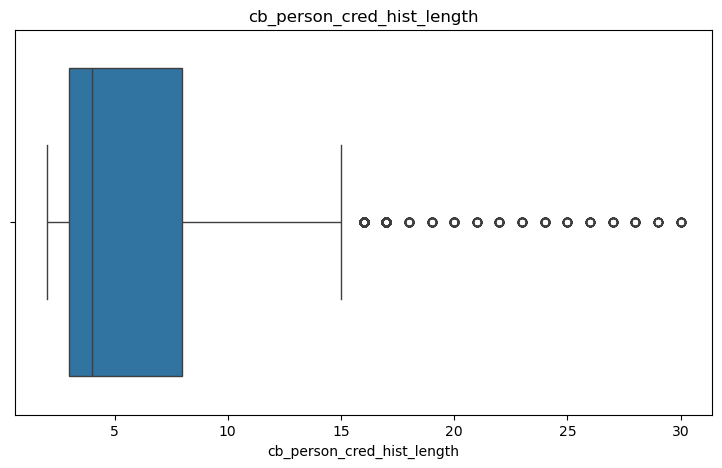

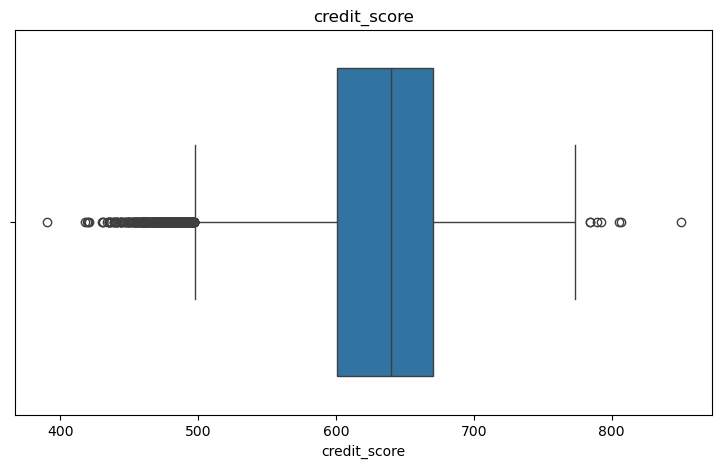

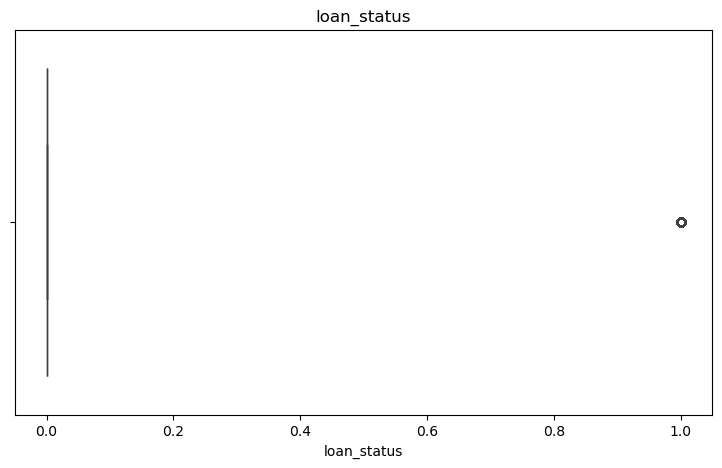

In [79]:
for col in num_cols:
    plt.figure(figsize=(9,5))
    sns.boxplot(data=df,x=col)
    plt.title(col)
    plt.show()

#### Handling Outliers

In [80]:
num_cols.remove('loan_status')

In [81]:
for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])

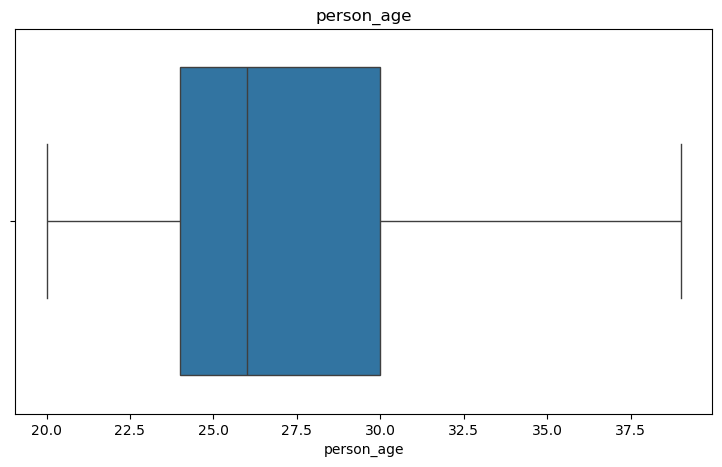

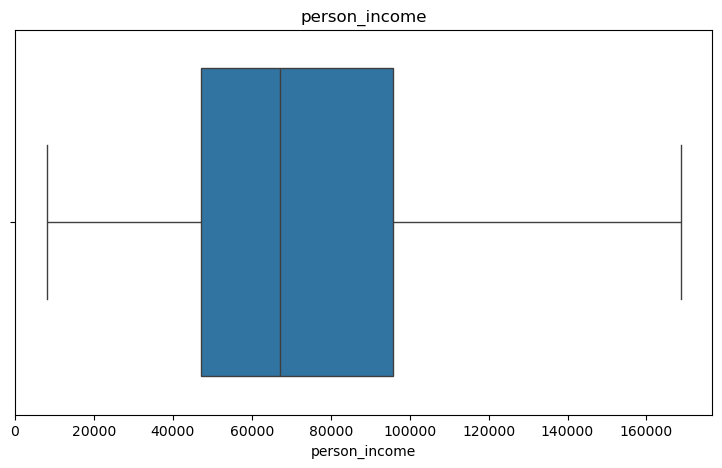

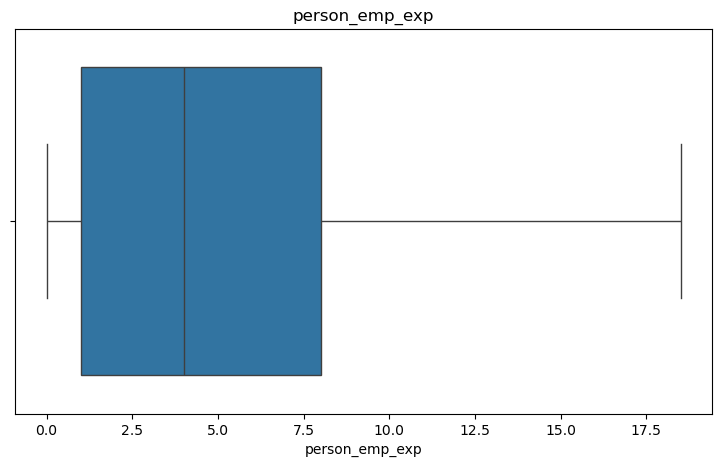

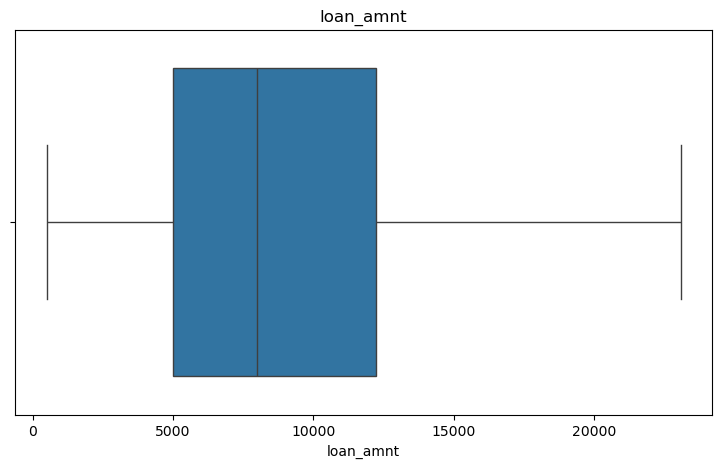

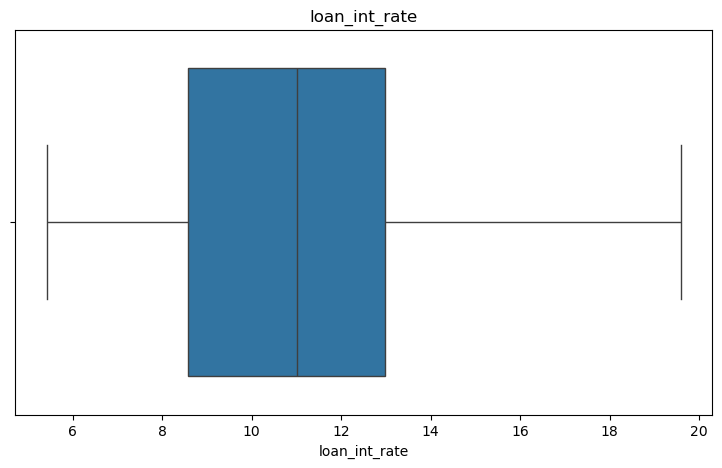

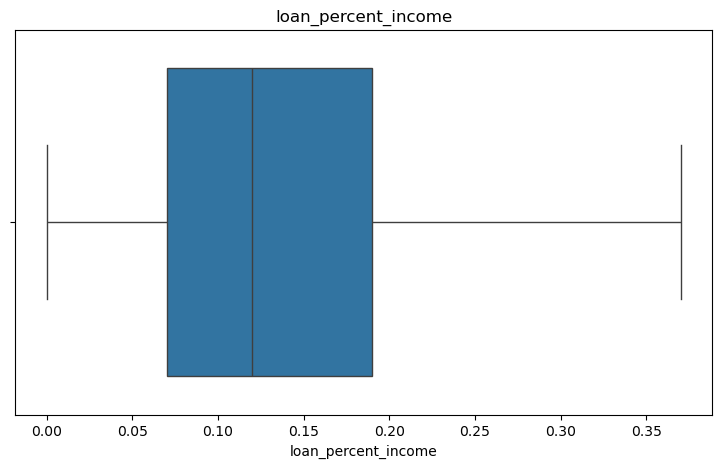

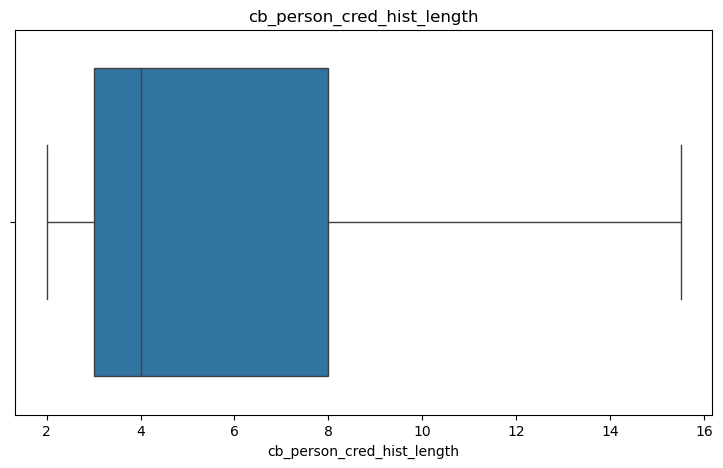

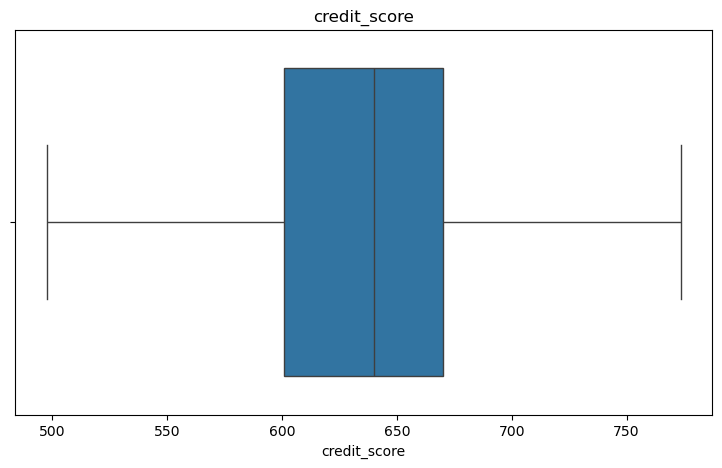

In [82]:
for col in num_cols:
    plt.figure(figsize=(9,5))
    sns.boxplot(data=df,x=col)
    plt.title(col)
    plt.show()

In [83]:
df.describe()

person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   45000.000000    45000.000000  45000.000000   
mean      27.444733   75677.400428        5.170311   9411.042900   
std        4.930055   38071.779506        5.137068   5832.950765   
min       20.000000    8000.000000        0.000000    500.000000   
25%       24.000000   47204.000000        1.000000   5000.000000   
50%       26.000000   67048.000000        4.000000   8000.000000   
75%       30.000000   95789.250000        8.000000  12237.250000   
max       39.000000  168667.125000       18.500000  23093.125000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.005676             0.138842                    5.783711   
std         2.976069             0.084360                    3.578787   
min         5.420000             0.000000                    2.000000   
25%         8.590000             0.070000                    3.000000   
50%        11.010000             0.120000                    4.000000   
75%        12.990000             0.190000                    8.000000   
max        19.590000             0.370000                   15.500000   

       credit_score   loan_status  
count   45000.00000  45000.000000  
mean      632.80830      0.222222  
std        49.80135      0.415744  
min       497.50000      0.000000  
25%       601.00000      0.000000  
50%       640.00000      0.000000  
75%       670.00000      0.000000  
max       773.50000      1.000000

### Splitting the data into test and training before more processing

In [84]:
X=df.drop(columns=['loan_status'])
y=df['loan_status']

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [86]:
X_train.head(2)

person_age person_gender person_education  person_income  \
25180        34.0        female         Bachelor        97265.0   
12555        25.0          male      High School        72953.0   

       person_emp_exp person_home_ownership  loan_amnt loan_intent  \
25180            11.0              MORTGAGE    15000.0    PERSONAL   
12555             3.0                  RENT    12000.0     VENTURE   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
25180          12.73                 0.15                         9.0   
12555          11.86                 0.16                         4.0   

       credit_score previous_loan_defaults_on_file  
25180         631.0                             No  
12555         659.0                            Yes

### Preprocessing the training set

##### Label encoding the categorical columns

In [87]:
[f"{col} - {X_train[col].nunique()}" for col in X_train.columns if X_train[col].dtype=='O']

['person_gender - 2',
 'person_education - 5',
 'person_home_ownership - 4',
 'loan_intent - 6',
 'previous_loan_defaults_on_file - 2']

In [88]:
cat_features = [col for col in X_train.columns if X_train[col].dtype == 'O']
print("Categorical Features:", cat_features)

Categorical Features: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']


In [89]:
X_train_le = X_train.copy()
X_test_le = X_test.copy()

# Apply Label Encoding for binary categorical variables
le = LabelEncoder()
for col in cat_features:
    if X_train[col].nunique() == 2:  # Binary categorical
        X_train_le[col] = le.fit_transform(X_train[col])
        X_test_le[col] = le.transform(X_test[col])  # Apply same transformation

# Apply One-Hot Encoding for nominal categorical variables
X_train_le = pd.get_dummies(X_train_le, columns=[col for col in cat_features if X_train[col].nunique() > 2], drop_first=True,dtype=int)
X_test_le = pd.get_dummies(X_test_le, columns=[col for col in cat_features if X_test[col].nunique() > 2], drop_first=True,dtype=int)


In [90]:
X_train_le.head()

person_age  person_gender  person_income  person_emp_exp  loan_amnt  \
25180        34.0              0      97265.000            11.0  15000.000   
12555        25.0              1      72953.000             3.0  12000.000   
29153        39.0              0     168667.125            18.0  23093.125   
23838        27.0              1      94232.000             4.0   9600.000   
35686        27.0              1      84873.000             7.0   7059.000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
25180          12.73                 0.15                         9.0   
12555          11.86                 0.16                         4.0   
29153          10.37                 0.07                        11.0   
23838          17.14                 0.10                         7.0   
35686          12.97                 0.08                         3.0   

       credit_score  previous_loan_defaults_on_file  ...  \
25180         631.0                               0  ...   
12555         659.0                               1  ...   
29153         683.0                               1  ...   
23838         641.0                               0  ...   
35686         706.0                               1  ...   

       person_education_High School  person_education_Master  \
25180                             0                        0   
12555                             1                        0   
29153                             0                        1   
23838                             0                        0   
35686                             0                        1   

       person_home_ownership_OTHER  person_home_ownership_OWN  \
25180                            0                          0   
12555                            0                          0   
29153                            0                          0   
23838                            0                          0   
35686                            0                          0   

       person_home_ownership_RENT  loan_intent_EDUCATION  \
25180                           0                      0   
12555                           1                      0   
29153                           0                      0   
23838                           1                      1   
35686                           1                      0   

       loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  \
25180                            0                    0                     1   
12555                            0                    0                     0   
29153                            0                    0                     1   
23838                            0                    0                     0   
35686                            1                    0                     0   

       loan_intent_VENTURE  
25180                    0  
12555                    1  
29153                    0  
23838                    0  
35686                    0  

[5 rows x 22 columns]

In [91]:
X_train_le.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36000 entries, 25180 to 15795
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      36000 non-null  float64
 1   person_gender                   36000 non-null  int32  
 2   person_income                   36000 non-null  float64
 3   person_emp_exp                  36000 non-null  float64
 4   loan_amnt                       36000 non-null  float64
 5   loan_int_rate                   36000 non-null  float64
 6   loan_percent_income             36000 non-null  float64
 7   cb_person_cred_hist_length      36000 non-null  float64
 8   credit_score                    36000 non-null  float64
 9   previous_loan_defaults_on_file  36000 non-null  int32  
 10  person_education_Bachelor       36000 non-null  int32  
 11  person_education_Doctorate      36000 non-null  int32  
 12  person_education_High School    3

##### Scaling the numerical features

In [92]:
num_features = [col for col in X_train_le.columns if X_train_le[col].dtype in ['int64', 'float64']]
print("Numerical Features:", num_features)

Numerical Features: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']


In [93]:
scaler = StandardScaler()  
# Fiting only on training data & transform both train and test
X_train_scaled = X_train_le.copy()
X_test_scaled = X_test_le.copy()

X_train_scaled[num_features] = scaler.fit_transform(X_train_le[num_features])  # Fit on training set
X_test_scaled[num_features] = scaler.transform(X_test_le[num_features])  # Transform test set


In [94]:
X_train_scaled.head()

person_age  person_gender  person_income  person_emp_exp  loan_amnt  \
25180    1.333692              0       0.564873        1.140482   0.958210   
12555   -0.494187              1      -0.073120       -0.419118   0.443820   
29153    2.349180              0       2.438599        2.505133   2.345884   
23838   -0.087992              1       0.485281       -0.224168   0.032308   
35686   -0.087992              1       0.239684        0.360682  -0.403380   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
25180       0.578780             0.132892                    0.905852   
12555       0.287519             0.251466                   -0.495227   
29153      -0.211308            -0.815699                    1.466284   
23838       2.055171            -0.459978                    0.345420   
35686       0.659127            -0.697125                   -0.775443   

       credit_score  previous_loan_defaults_on_file  ...  \
25180     -0.036610                               0  ...   
12555      0.527277                               1  ...   
29153      1.010608                               1  ...   
23838      0.164778                               0  ...   
35686      1.473801                               1  ...   

       person_education_High School  person_education_Master  \
25180                             0                        0   
12555                             1                        0   
29153                             0                        1   
23838                             0                        0   
35686                             0                        1   

       person_home_ownership_OTHER  person_home_ownership_OWN  \
25180                            0                          0   
12555                            0                          0   
29153                            0                          0   
23838                            0                          0   
35686                            0                          0   

       person_home_ownership_RENT  loan_intent_EDUCATION  \
25180                           0                      0   
12555                           1                      0   
29153                           0                      0   
23838                           1                      1   
35686                           1                      0   

       loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  \
25180                            0                    0                     1   
12555                            0                    0                     0   
29153                            0                    0                     1   
23838                            0                    0                     0   
35686                            1                    0                     0   

       loan_intent_VENTURE  
25180                    0  
12555                    1  
29153                    0  
23838                    0  
35686                    0  

[5 rows x 22 columns]

### Feature Engineering

In [95]:
[col for col in X_train_scaled.columns if X_test_scaled[col].dtypes !='O']

['person_age',
 'person_gender',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'previous_loan_defaults_on_file',
 'person_education_Bachelor',
 'person_education_Doctorate',
 'person_education_High School',
 'person_education_Master',
 'person_home_ownership_OTHER',
 'person_home_ownership_OWN',
 'person_home_ownership_RENT',
 'loan_intent_EDUCATION',
 'loan_intent_HOMEIMPROVEMENT',
 'loan_intent_MEDICAL',
 'loan_intent_PERSONAL',
 'loan_intent_VENTURE']


🔹 Target is Categorical → Using ANOVA Test
ANOVA Test for person_age: p-value = 0.0000


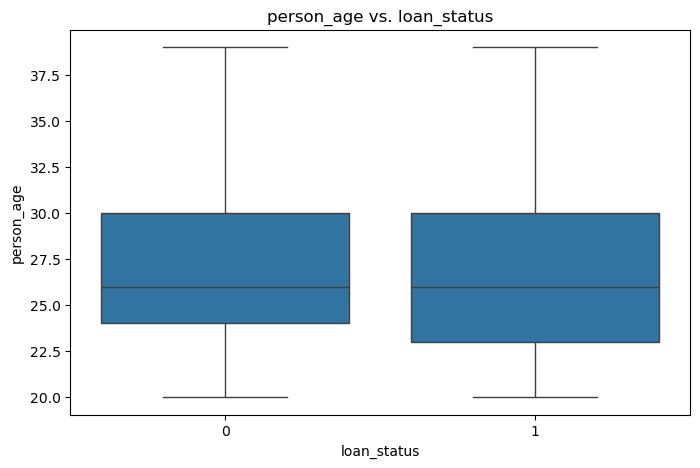

✅ person_age significantly impacts loan_status (Keep)
ANOVA Test for person_income: p-value = 0.0000


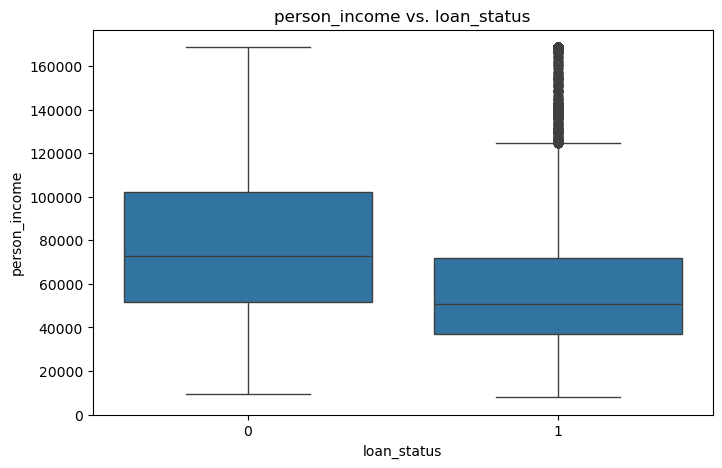

✅ person_income significantly impacts loan_status (Keep)
ANOVA Test for person_emp_exp: p-value = 0.0000


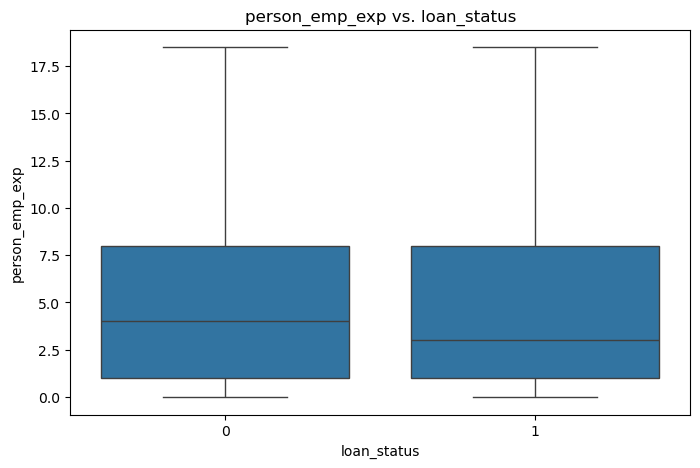

✅ person_emp_exp significantly impacts loan_status (Keep)
ANOVA Test for loan_amnt: p-value = 0.0000


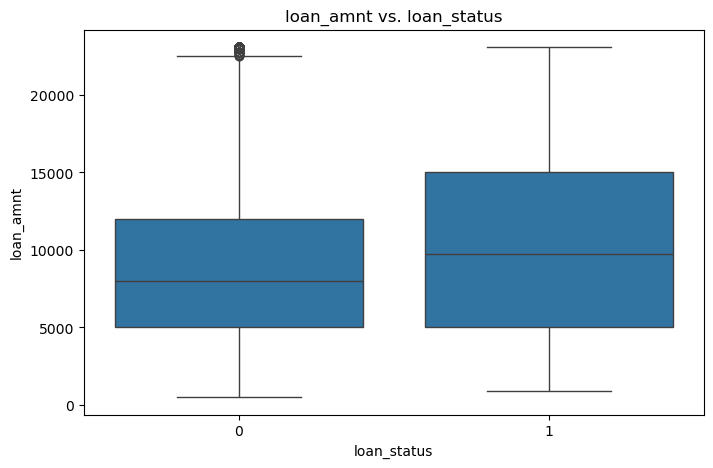

✅ loan_amnt significantly impacts loan_status (Keep)
ANOVA Test for loan_int_rate: p-value = 0.0000


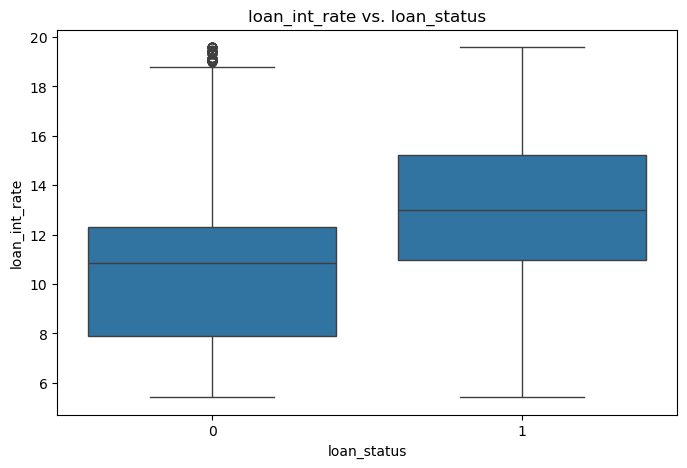

✅ loan_int_rate significantly impacts loan_status (Keep)
ANOVA Test for loan_percent_income: p-value = 0.0000


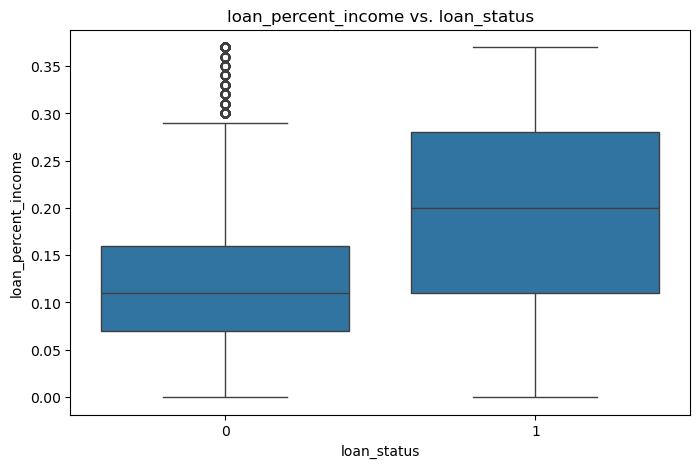

✅ loan_percent_income significantly impacts loan_status (Keep)
ANOVA Test for cb_person_cred_hist_length: p-value = 0.0002


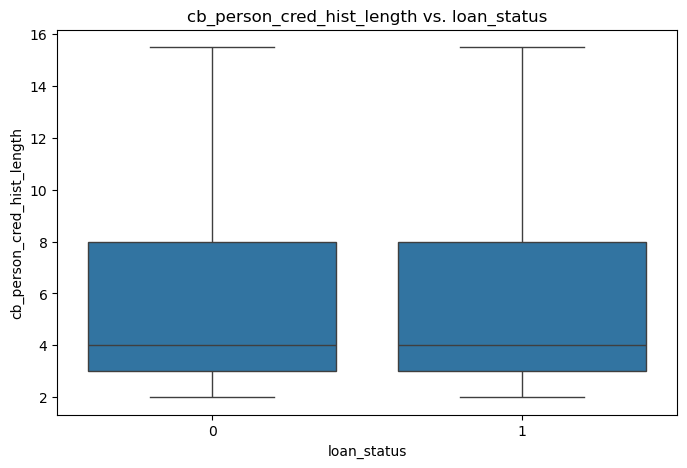

✅ cb_person_cred_hist_length significantly impacts loan_status (Keep)
ANOVA Test for credit_score: p-value = 0.1033


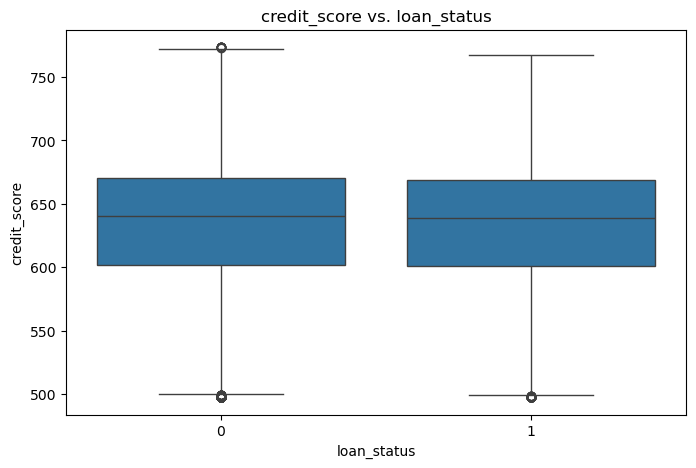

❌ credit_score has little impact on loan_status (Consider Removing)

ANOVA Test for loan_status: p-value = 0.0000


C:\Users\HP\anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


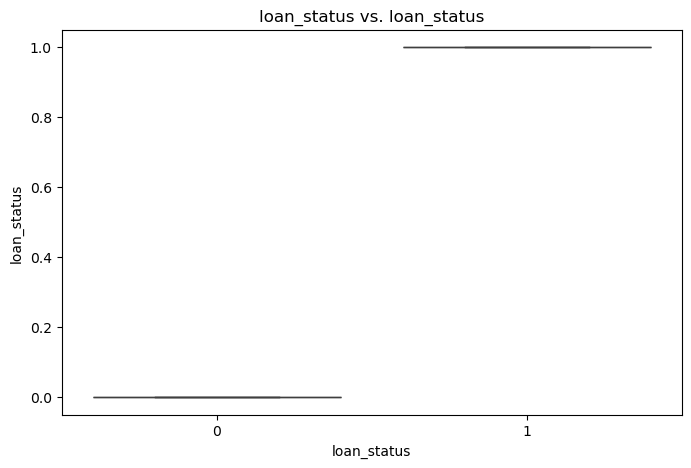

✅ loan_status significantly impacts loan_status (Keep)


In [96]:
import scipy.stats as stats


target = "loan_status" 

# Identify numerical features
numerical_features = [col for col in df.columns if df[col].dtypes !='O']

# Check if target is categorical or numerical
if df[target].dtype == "object" or df[target].nunique() <= 10:  
    print("\n🔹 Target is Categorical → Using ANOVA Test")

    for feature in numerical_features:
        f_stat, p_value = stats.f_oneway(*[df[df[target] == cat][feature] for cat in df[target].unique()])
        print(f"ANOVA Test for {feature}: p-value = {p_value:.4f}")

        # Visualization: Boxplot
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df[target], y=df[feature])
        plt.title(f"{feature} vs. {target}")
        plt.xlabel(target)
        plt.ylabel(feature)
        plt.show()

        if p_value < 0.05:
            print(f"✅ {feature} significantly impacts {target} (Keep)")
        else:
            print(f"❌ {feature} has little impact on {target} (Consider Removing)\n")

else:
    print("\n🔹 Target is Numerical → Using Pearson Correlation")
    
    # Compute Pearson Correlation
    correlation_scores = df[numerical_features + [target]].corr()[target].sort_values(ascending=False)
    print(correlation_scores)


In [97]:
# Selecting only the significant numerical features from ANOVA test
selected_features = [
    "person_age",
    "person_income",
    "person_emp_exp",
    "loan_amnt",
    "loan_int_rate",
    "loan_percent_income",
    "cb_person_cred_hist_length"
]

# Creating a new DataFrame with only these features
X = df[selected_features]

# Adding a constant for VIF calculation
X = np.c_[np.ones(X.shape[0]), X]  # Adding a column of ones for intercept
vif_data = pd.DataFrame()
vif_data["Feature"] = ["Intercept"] + selected_features  # Naming the intercept
vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

# Display VIF results
print(vif_data)

                      Feature         VIF
0                   Intercept  241.992316
1                  person_age   10.807477
2               person_income    4.284999
3              person_emp_exp    8.174761
4                   loan_amnt    5.986128
5               loan_int_rate    1.029754
6         loan_percent_income    5.642111
7  cb_person_cred_hist_length    4.285679


✅ Low Multicollinearity (VIF < 5) – Keep These Features:

person_income (1.44)

loan_amnt (2.04)

loan_int_rate (1.02)

loan_percent_income (2.02)

cb_person_cred_hist_length (3.93)

⚠️ Moderate to High Multicollinearity (VIF > 10) – Needs Action:

person_age (14.11) ❌

person_emp_exp (11.23) ❌

In [98]:
# Checking correlation between 'person_age' and 'person_emp_exp'
df[["person_age", "person_emp_exp"]].corr()

person_age  person_emp_exp
person_age        1.000000        0.936465
person_emp_exp    0.936465        1.000000

We can drop one of the 2 columns - person_emp_exp

removing credit score column as it does not impact the target variable and also age column as the emp_exp  would alos give a approx age category

In [99]:
X_train_scaled.head(1)

person_age  person_gender  person_income  person_emp_exp  loan_amnt  \
25180    1.333692              0       0.564873        1.140482    0.95821   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
25180        0.57878             0.132892                    0.905852   

       credit_score  previous_loan_defaults_on_file  ...  \
25180      -0.03661                               0  ...   

       person_education_High School  person_education_Master  \
25180                             0                        0   

       person_home_ownership_OTHER  person_home_ownership_OWN  \
25180                            0                          0   

       person_home_ownership_RENT  loan_intent_EDUCATION  \
25180                           0                      0   

       loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  \
25180                            0                    0                     1   

       loan_intent_VENTURE  
25180                    0  

[1 rows x 22 columns]

In [100]:
X_train_scaled.drop(columns = ['person_age','credit_score'],inplace=True)
X_test_scaled.drop(columns = ['person_age','credit_score'],inplace=True)

In [101]:
X_train_scaled.head(1)

person_gender  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
25180              0       0.564873        1.140482    0.95821        0.57878   

       loan_percent_income  cb_person_cred_hist_length  \
25180             0.132892                    0.905852   

       previous_loan_defaults_on_file  person_education_Bachelor  \
25180                               0                          1   

       person_education_Doctorate  person_education_High School  \
25180                           0                             0   

       person_education_Master  person_home_ownership_OTHER  \
25180                        0                            0   

       person_home_ownership_OWN  person_home_ownership_RENT  \
25180                          0                           0   

       loan_intent_EDUCATION  loan_intent_HOMEIMPROVEMENT  \
25180                      0                            0   

       loan_intent_MEDICAL  loan_intent_PERSONAL  loan_intent_VENTURE  
25180                    0                     1                    0

In [102]:
categorical_features = ["person_home_ownership", "loan_intent", "previous_loan_defaults_on_file"]

print("\n🔹 Chi-Square Test for Categorical Features:")

for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df["loan_status"])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"{feature}: p-value = {p:.4f}")

    if p < 0.05:
        print(f"✅ {feature} significantly impacts {target} (Keep)")
    else:
        print(f"❌ {feature} has little impact on {target} (Consider Removing)\n")


🔹 Chi-Square Test for Categorical Features:
person_home_ownership: p-value = 0.0000
✅ person_home_ownership significantly impacts loan_status (Keep)
loan_intent: p-value = 0.0000
✅ loan_intent significantly impacts loan_status (Keep)
previous_loan_defaults_on_file: p-value = 0.0000
✅ previous_loan_defaults_on_file significantly impacts loan_status (Keep)


# Model Building and Evaluation

In [103]:
X_train_scaled.head(1)

person_gender  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
25180              0       0.564873        1.140482    0.95821        0.57878   

       loan_percent_income  cb_person_cred_hist_length  \
25180             0.132892                    0.905852   

       previous_loan_defaults_on_file  person_education_Bachelor  \
25180                               0                          1   

       person_education_Doctorate  person_education_High School  \
25180                           0                             0   

       person_education_Master  person_home_ownership_OTHER  \
25180                        0                            0   

       person_home_ownership_OWN  person_home_ownership_RENT  \
25180                          0                           0   

       loan_intent_EDUCATION  loan_intent_HOMEIMPROVEMENT  \
25180                      0                            0   

       loan_intent_MEDICAL  loan_intent_PERSONAL  loan_intent_VENTURE  
25180                    0                     1                    0

In [104]:
model_performance = {}
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(max_iter=500)
}

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    model_performance[model.__class__.__name__] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    }

    print(f"{model.__class__.__name__}:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}" if roc_auc is not None else "ROC AUC: N/A")
    print("\n")


# Train and evaluate all models
for name, model in models.items():
    print(f"Evaluating {name}...")
    evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)


Evaluating Logistic Regression...
LogisticRegression:
Accuracy: 0.8896
Precision: 0.8880
Recall: 0.8896
F1 Score: 0.8887
ROC AUC: 0.9503


Evaluating K-Nearest Neighbors...
KNeighborsClassifier:
Accuracy: 0.8996
Precision: 0.8971
Recall: 0.8996
F1 Score: 0.8978
ROC AUC: 0.9293


Evaluating Support Vector Machine...
SVC:
Accuracy: 0.9149
Precision: 0.9128
Recall: 0.9149
F1 Score: 0.9129
ROC AUC: 0.9620


Evaluating Decision Tree...
DecisionTreeClassifier:
Accuracy: 0.9046
Precision: 0.9048
Recall: 0.9046
F1 Score: 0.9047
ROC AUC: 0.8636


Evaluating Random Forest...
RandomForestClassifier:
Accuracy: 0.9286
Precision: 0.9273
Recall: 0.9286
F1 Score: 0.9266
ROC AUC: 0.9734


Evaluating Gradient Boosting...
GradientBoostingClassifier:
Accuracy: 0.9209
Precision: 0.9192
Recall: 0.9209
F1 Score: 0.9186
ROC AUC: 0.9694


Evaluating XGBoost...


C:\Users\HP\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:10:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier:
Accuracy: 0.9309
Precision: 0.9296
Recall: 0.9309
F1 Score: 0.9296
ROC AUC: 0.9775


Evaluating LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7990, number of negative: 28010
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 862
[LightGBM] [Info] Number of data points in the train set: 36000, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221944 -> initscore=-1.254371
[LightGBM] [Info] Start training from score -1.254371
LGBMClassifier:
Accuracy: 0.9270
Precision: 0.9255
Recall: 0.9270
F1 Score: 0.9252
ROC AUC: 0.9764


Evaluating CatBoost...
CatBoostClassifier:
Accuracy: 0.9306
Precision: 0.9292
Recall: 0.9306
F1 Score: 0.9290
ROC AUC: 0.9768


Evaluating Naive Bayes...
GaussianNB:
Accuracy: 0.7489
Precision: 0.8747
Rec

In [105]:
performance_df = pd.DataFrame(model_performance).T

# Sort models by the highest F1 Score (or Accuracy)
performance_df.sort_values(by="F1 Score", ascending=False)

Accuracy  Precision    Recall  F1 Score   ROC AUC
XGBClassifier               0.930889   0.929569  0.930889  0.929567  0.977477
CatBoostClassifier          0.930556   0.929241  0.930556  0.928974  0.976839
RandomForestClassifier      0.928556   0.927271  0.928556  0.926575  0.973357
LGBMClassifier              0.927000   0.925548  0.927000  0.925150  0.976369
GradientBoostingClassifier  0.920889   0.919173  0.920889  0.918565  0.969435
SVC                         0.914889   0.912786  0.914889  0.912923  0.962049
MLPClassifier               0.915333   0.913289  0.915333  0.912695  0.966434
DecisionTreeClassifier      0.904556   0.904779  0.904556  0.904665  0.863589
KNeighborsClassifier        0.899556   0.897075  0.899556  0.897799  0.929291
LogisticRegression          0.889556   0.887998  0.889556  0.888665  0.950282
GaussianNB                  0.748889   0.874727  0.748889  0.769837  0.940497

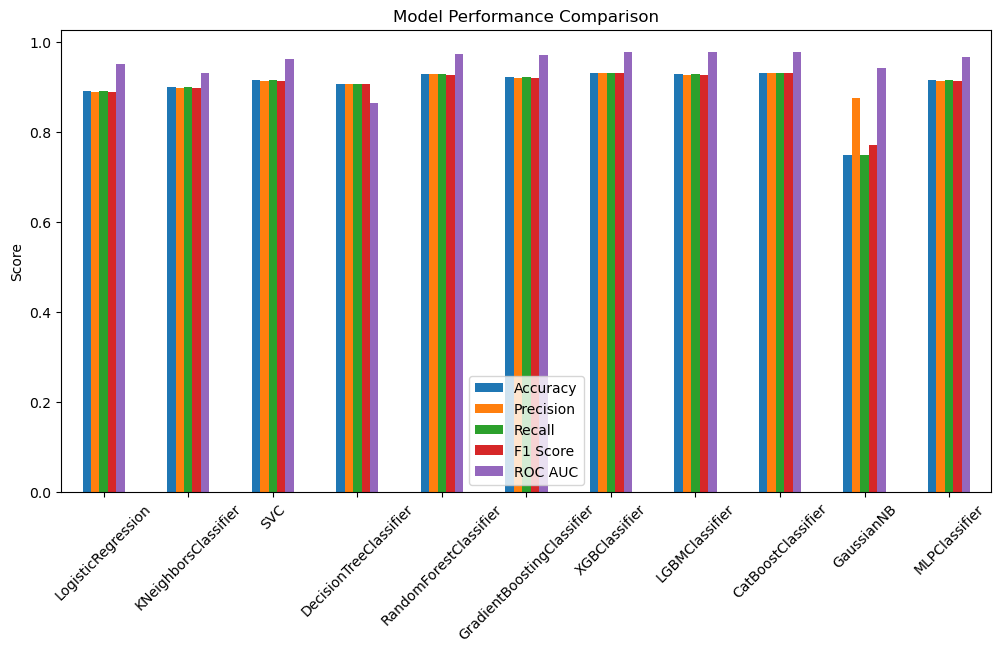

In [106]:
performance_df.plot(kind='bar', figsize=(12, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="best")
plt.show()

In [107]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Initialize model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(xgb, param_grid, scoring='f1_weighted', cv=5, verbose=1, n_jobs=-1)

# Fit model
grid_search.fit(X_train_scaled, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_xgb = grid_search.best_estimator_

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


C:\Users\HP\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}


In [108]:
from sklearn.metrics import classification_report

# Predict on test set
y_pred = best_xgb.predict(X_test_scaled)

# Print evaluation report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6990
           1       0.89      0.81      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.89      0.90      9000
weighted avg       0.93      0.93      0.93      9000



In [109]:
import joblib
joblib.dump(best_xgb, "best_xgb_model.pkl")

['best_xgb_model.pkl']